# Telecom Churn Case Study

### Importing all necessary libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

### Step1: Reading & understanding the Data

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Checking the number of rows and columns uploaded
telecom.shape

(99999, 226)

In [5]:
# Checking for duplicate records
telecom[telecom.duplicated()]

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

In [6]:
# Checking the datatype of the columns
telecom.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
# Checking the values distribution across all columns
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

### Step2:  Data Cleaning

In [8]:
# First we will copy the loaded dataset into another dataset so that we do not lose out on the original dataset
telecom_v1 = telecom[:]
telecom_v1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [9]:
# Checking the shape to ensure the correct copying
telecom_v1.shape

(99999, 226)

In [10]:
# Checking the missing values in the columns
round(100*(telecom_v1.isnull().sum()/len(telecom_v1.index)), 2).sort_values(ascending = False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [11]:
# Deleting the date columns since they do not have much value and are also more than 75% missing values
telecom_v1 = telecom_v1.drop(columns = ['date_of_last_rech_9','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6',
                                   'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                                   'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'])
telecom_v1.shape

(99999, 214)

In [12]:
# Checking unique values in the columns
telecom_v1.nunique()

mobile_number         99999
circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
onnet_mou_6           24313
onnet_mou_7           24336
onnet_mou_8           24089
onnet_mou_9           23565
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
roam_ic_mou_6          6512
roam_ic_mou_7          5230
roam_ic_mou_8          5315
roam_ic_mou_9          4827
roam_og_mou_6          8038
roam_og_mou_7          6639
roam_og_mou_8          6504
roam_og_mou_9          5882
loc_og_t2t_mou_6      13539
loc_og_t2t_mou_7      13411
loc_og_t2t_mou_8      13336
loc_og_t2t_mou_9      12949
loc_og_t2m_mou_6      20905
loc_og_t2m_mou_7      20637
loc_og_t2m_mou_8      20544
loc_og_t2m_mou_9      20141
loc_og_t2f_mou_6       3860
loc_og_t2f_mou_7       3863
loc_og_t2f_mou_8    

In [13]:
# Removing the columns having 1 unique value since they will not add any information 
telecom_v2 = telecom_v1[:]
telecom_v2 = telecom_v2.drop(columns = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                         'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
                         'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'])
telecom_v2.shape

(99999, 202)

In [14]:
# Checking the missing values again in the columns
round(100*(telecom_v2.isnull().sum()/len(telecom_v2.index)), 2).sort_values(ascending = False)

count_rech_3g_6       74.85
fb_user_6             74.85
total_rech_data_6     74.85
max_rech_data_6       74.85
count_rech_2g_6       74.85
av_rech_amt_data_6    74.85
arpu_3g_6             74.85
night_pck_user_6      74.85
arpu_2g_6             74.85
arpu_3g_7             74.43
total_rech_data_7     74.43
fb_user_7             74.43
max_rech_data_7       74.43
count_rech_3g_7       74.43
arpu_2g_7             74.43
count_rech_2g_7       74.43
av_rech_amt_data_7    74.43
night_pck_user_7      74.43
count_rech_3g_9       74.08
fb_user_9             74.08
total_rech_data_9     74.08
arpu_3g_9             74.08
max_rech_data_9       74.08
count_rech_2g_9       74.08
av_rech_amt_data_9    74.08
arpu_2g_9             74.08
night_pck_user_9      74.08
total_rech_data_8     73.66
night_pck_user_8      73.66
max_rech_data_8       73.66
arpu_3g_8             73.66
count_rech_2g_8       73.66
count_rech_3g_8       73.66
av_rech_amt_data_8    73.66
arpu_2g_8             73.66
fb_user_8           

In [15]:
# Imputing the missing values with 0 for the recharge variables since missing value ideally means no recharge data
telecom_v3 = telecom_v2[:]
columns_to_fill = ['count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6',
                   'count_rech_2g_6','count_rech_3g_7','av_rech_amt_data_7','max_rech_data_7','total_rech_data_7','arpu_3g_7',
                   'arpu_2g_7','count_rech_2g_7','count_rech_3g_8','av_rech_amt_data_8','max_rech_data_8','total_rech_data_8',
                   'arpu_3g_8','arpu_2g_8','count_rech_2g_8','count_rech_3g_9','av_rech_amt_data_9','max_rech_data_9',
                   'total_rech_data_9','arpu_3g_9','arpu_2g_9','count_rech_2g_9']

for i in columns_to_fill:
    telecom_v3[i] = telecom_v3[i].fillna(0)

# Checking the missing values again in the columns
round(100*(telecom_v3.isnull().sum()/len(telecom_v3.index)), 2).sort_values(ascending = False)

fb_user_6             74.85
night_pck_user_6      74.85
night_pck_user_7      74.43
fb_user_7             74.43
fb_user_9             74.08
night_pck_user_9      74.08
fb_user_8             73.66
night_pck_user_8      73.66
og_others_9            7.75
loc_ic_t2t_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_og_t2f_mou_9       7.75
std_ic_t2m_mou_9       7.75
loc_og_mou_9           7.75
std_ic_t2t_mou_9       7.75
std_og_t2t_mou_9       7.75
std_og_t2m_mou_9       7.75
loc_ic_mou_9           7.75
std_og_t2f_mou_9       7.75
loc_ic_t2f_mou_9       7.75
loc_og_t2m_mou_9       7.75
isd_og_mou_9           7.75
loc_ic_t2m_mou_9       7.75
spl_og_mou_9           7.75
std_og_mou_9           7.75
loc_og_t2c_mou_9       7.75
roam_og_mou_9          7.75
onnet_mou_9            7.75
isd_ic_mou_9           7.75
offnet_mou_9           7.75
spl_ic_mou_9           7.75
roam_ic_mou_9          7.75
std_ic_mou_9           7.75
loc_og_t2t_mou_9       7.75
ic_others_9            7.75
og_others_8         

In [16]:
telecom_v3[telecom_v3.isna().any(axis=1)]

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0         7000842753  197.385  214.816  213.803   21.100          NaN   
1         7001865778   34.047  355.074  268.321   86.285        24.11   
2         7001625959  167.690  189.058  210.226  290.714        11.54   
3         7001204172  221.338  251.102  508.054  389.500        99.91   
4         7000142493  261.636  309.876  238.174  163.426        50.31   
...              ...      ...      ...      ...      ...          ...   
99993     7002074629    8.440    0.000   80.387    0.000          NaN   
99994     7001548952   18.471   69.161   57.530   29.950         5.40   
99995     7000607688  112.201   77.811   79.081  140.835        29.26   
99996     7000087541  229.187    0.000    0.000    0.000         1.11   
99998     7001905007  687.065    0.000    0.000    0.000        84.34   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0              NaN         0.00          NaN           NaN           NaN   
1            78.68         7.68        18.34         15.74         99.84   
2            55.24        37.26        74.81        143.33        220.59   
3            54.39       310.98       241.71        123.31        109.01   
4           149.44        83.89        58.78         76.96         91.88   
...            ...          ...          ...           ...           ...   
99993          NaN          NaN          NaN           NaN           NaN   
99994         3.36         5.91         0.00         15.19         54.46   
99995        18.13        16.06        49.49        100.83         69.01   
99996          NaN          NaN          NaN         21.04           NaN   
99998          NaN          NaN          NaN        166.46           NaN   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00           NaN            NaN            NaN   
1            304.76         53.76            0.0           0.00   
2            208.36        118.91            0.0           0.00   
3             71.68        113.54            0.0          54.86   
4            124.26         45.81            0.0           0.00   
...             ...           ...            ...            ...   
99993           NaN           NaN            NaN            NaN   
99994         52.79         27.14            0.0           0.00   
99995         66.39         56.13            0.0           0.00   
99996           NaN           NaN            0.0            NaN   
99998           NaN           NaN            0.0            NaN   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0               0.00            NaN            NaN            NaN   
1               0.00           0.00            0.0           0.00   
2               0.00          38.49            0.0           0.00   
3              44.38           0.00            0.0          28.09   
4               0.00           0.00            0.0           0.00   
...              ...            ...            ...            ...   
99993            NaN            NaN            NaN            NaN   
99994           0.00           0.00            0.0           0.00   
99995           0.00           0.95            0.0           0.00   
99996            NaN            NaN            0.0            NaN   
99998            NaN            NaN            0.0            NaN   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0               0.00            NaN               NaN               NaN   
1               0.00           0.00             23.88             74.56   
2               0.00          70.94              7.19             28.74   
3              39.04           0.00             73.68             34.81   
4               0.00           0.00             50.31            149.44   
...              ...            ...               ...               ...   
99993            NaN            NaN               NaN     

In [17]:
# Since the above columns having missing values means that there is no data oresent, let's impute it with 0
columns_to_fill2 = ['std_ic_t2f_mou_9','roam_ic_mou_9','spl_ic_mou_9','loc_og_mou_9','loc_og_t2f_mou_9','spl_og_mou_9','isd_ic_mou_9',
           'loc_ic_t2m_mou_9','loc_og_t2m_mou_9','std_og_t2t_mou_9','loc_og_t2t_mou_9','ic_others_9','std_ic_mou_9',
           'roam_og_mou_9','std_og_t2m_mou_9','loc_ic_t2f_mou_9','loc_og_t2c_mou_9','onnet_mou_9','og_others_9',
           'loc_ic_t2t_mou_9','offnet_mou_9','loc_ic_mou_9','std_ic_t2m_mou_9','isd_og_mou_9','std_og_t2f_mou_9',
           'std_ic_t2t_mou_9','std_og_mou_9','loc_og_mou_8','og_others_8','isd_og_mou_8','std_og_t2f_mou_8','std_og_t2t_mou_8',
           'ic_others_8','std_og_mou_8','loc_ic_t2t_mou_8','std_og_t2m_mou_8','isd_ic_mou_8','loc_ic_t2m_mou_8',
           'loc_og_t2f_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','onnet_mou_8',
           'std_ic_t2m_mou_8','offnet_mou_8','std_ic_t2f_mou_8','loc_og_t2c_mou_8','spl_og_mou_8','std_ic_mou_8',
           'loc_og_t2t_mou_8','loc_ic_t2f_mou_8','loc_og_t2m_mou_8','spl_ic_mou_8','std_ic_mou_6','loc_ic_t2m_mou_6',
           'std_ic_t2f_mou_6','loc_ic_t2f_mou_6','ic_others_6','loc_ic_t2t_mou_6','std_ic_t2m_mou_6','spl_ic_mou_6',
           'std_ic_t2t_mou_6','og_others_6','isd_ic_mou_6','isd_og_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6',
           'roam_og_mou_6','std_og_t2f_mou_6','loc_og_t2f_mou_6','std_og_mou_6','roam_ic_mou_6','loc_og_t2t_mou_6',
           'loc_ic_mou_6','offnet_mou_6','loc_og_t2m_mou_6','loc_og_t2c_mou_6','onnet_mou_6','spl_og_mou_6','loc_og_t2t_mou_7',
           'loc_ic_t2f_mou_7','spl_og_mou_7','roam_ic_mou_7','std_ic_mou_7','roam_og_mou_7','std_ic_t2f_mou_7','offnet_mou_7',
           'std_ic_t2m_mou_7','onnet_mou_7','std_ic_t2t_mou_7','loc_og_t2m_mou_7','spl_ic_mou_7','loc_og_t2f_mou_7',
           'std_og_t2m_mou_7','isd_og_mou_7','og_others_7','std_og_mou_7','std_og_t2f_mou_7','loc_ic_t2m_mou_7',
           'loc_ic_t2t_mou_7','ic_others_7','std_og_t2t_mou_7','loc_og_mou_7','isd_ic_mou_7','loc_og_t2c_mou_7','loc_ic_mou_7']

for i in columns_to_fill2:
    telecom_v3[i] = telecom_v3[i].fillna(0)

# Checking the missing values again in the columns
round(100*(telecom_v3.isnull().sum()/len(telecom_v3.index)), 2).sort_values(ascending = False)

night_pck_user_6      74.85
fb_user_6             74.85
night_pck_user_7      74.43
fb_user_7             74.43
night_pck_user_9      74.08
fb_user_9             74.08
fb_user_8             73.66
night_pck_user_8      73.66
max_rech_data_7        0.00
max_rech_data_8        0.00
count_rech_2g_6        0.00
total_rech_amt_6       0.00
max_rech_data_9        0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
max_rech_amt_9         0.00
last_day_rch_amt_6     0.00
last_day_rch_amt_7     0.00
last_day_rch_amt_8     0.00
total_rech_num_9       0.00
total_rech_data_6      0.00
total_rech_data_7      0.00
total_rech_data_8      0.00
total_rech_data_9      0.00
max_rech_data_6        0.00
last_day_rch_amt_9     0.00
mobile_number          0.00
total_rech_num_8       0.00
spl_ic_mou_9           0.00
std_ic_mou_8           0.00
std_ic_mou_9           0.00
total_ic_mou_6      

In [18]:
telecom_v3.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean    7.001207e+09    282.987358    278.536648    279.154731    261.645069   
std     6.956694e+05    328.439770    338.156291    344.474791    341.998630   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000606e+09     93.411500     86.980500     84.126000     62.685000   
50%     7.001205e+09    197.704000    191.640000    192.080000    176.849000   
75%     7.001812e+09    371.060000    365.344500    369.370500    353.466500   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     127.183397    128.512397    125.864313    120.210311    190.142776   
std      292.433718    303.869995    302.023240    298.331154    312.928229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     28.760000   
50%       30.980000     29.230000     28.040000     23.840000     89.680000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     189.441086    186.002904    175.595457       9.558277       6.873981   
std      321.759659    321.325854    310.968398      71.403643      72.029965   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       26.650000     23.840000     16.030000       0.000000       0.000000   
50%       85.440000     83.130000     74.680000       0.000000       0.000000   
75%      217.830000    215.500000    202.830000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        6.900761       5.852505      13.363643       9.439823   
std        66.558003      54.906445      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        9.435597       7.892887         45.246387         44.679599   
std        62.989180      56.176090        148.140370        152.555137   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.990000          1.000000   
50%         0.000000       0.000000         10.680000         10.430000   
75%         0.000000       0.000000         38.820000         37.890000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          43.419935         41.131346         89.667174         87.870081   
std          147.427075        142.647378        160.573349        155.423787   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.760000          0.250000          7.290000          7.490000   
50%           10.030000          8.860000         37.690000 

In [19]:
# Imputing the categorical columns with -1

columns_categ = ['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7','night_pck_user_8','fb_user_8','night_pck_user_9','fb_user_9']

for i in columns_categ:
    telecom_v3[i] = telecom_v3[i].fillna(-1)
    
# Checking the missing values again in the columns
round(100*(telecom_v3.isnull().sum()/len(telecom_v3.index)), 2).sort_values(ascending = False)

mobile_number         0.0
total_rech_data_7     0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_8     0.0
count_rech_3g_8       0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
total_rech_amt_8      0.0
total_rech_amt_7      0.0
total_rech_amt_6      0.0
total_rech_num_9      0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
spl_ic_mou_9          0.0
isd_ic_mou_6

In [20]:
# Converting the object type of the categorical variables

for i in columns_categ:
    telecom_v3[i] = telecom_v3[i].astype('object')

telecom_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 202 entries, mobile_number to sep_vbc_3g
dtypes: float64(160), int64(34), object(8)
memory usage: 154.1+ MB


### Step 3: Data Preprocessing

#### Step 3.1:  Filtering High Value Customers

In [21]:
# Creating a cost metric for 6th and 7th month

telecom_v4 = telecom_v3[:]
telecom_v4['tot_amt_6']=telecom_v4['total_rech_amt_6']+(telecom_v4['total_rech_data_6']*telecom_v4['av_rech_amt_data_6'])    
telecom_v4['tot_amt_7']=telecom_v4['total_rech_amt_7']+(telecom_v4['total_rech_data_7']*telecom_v4['av_rech_amt_data_7'])  

telecom_v4['avg_amt_6_7']=(telecom_v4['tot_amt_6']+telecom_v4['tot_amt_7'])/2

In [22]:
telecom_v4.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100         0.00   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00              0.00   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [23]:
# Filtering High Value Customers

telecom_v5=telecom_v4[telecom_v4['avg_amt_6_7']>= telecom_v4['avg_amt_6_7'].quantile(0.7)]
telecom_v5.shape

(30001, 205)

In [24]:
# Dropping the above columns created to filter high value customers since they are already present

telecom_v5 = telecom_v5.drop(columns = ['avg_amt_6_7','tot_amt_6','tot_amt_7'])
telecom_v5.shape

(30001, 202)

#### Step 3.2 : Deriving Churn

In [25]:
# Calculating calls and data usage

telecom_v5['tot_calls_mou_9'] = telecom_v5['total_ic_mou_9'] + telecom_v5['total_og_mou_9']
telecom_v5['tot_data_mb_9'] =  telecom_v5['vol_2g_mb_9'] + telecom_v5['vol_3g_mb_9']

# Creating a churn variable on the basis of above columns

telecom_v5['churn'] = telecom_v5.apply(lambda x: 1 if x['tot_calls_mou_9']==0 and x['tot_data_mb_9']==0 else 0, axis=1)

telecom_v5.head(100)

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0       7000842753   197.385   214.816   213.803    21.100         0.00   
7       7000701601  1069.180  1349.850  3171.480   500.000        57.84   
8       7001524846   378.721   492.223   137.362   166.787       413.69   
21      7002124215   514.453   597.753   637.760   578.596       102.41   
23      7000887461    74.350   193.897   366.966   811.480        48.96   
33      7000149764   977.020  2362.833   409.230   799.356         0.00   
38      7000815202   363.987   486.558   393.909   391.709       248.99   
41      7000721289   482.832   425.764   229.769   143.596        86.39   
48      7000294396  1873.271   575.927   179.218  1189.744      2061.69   
53      7002188521   978.077  1141.296   706.020  1076.247       135.14   
56      7002180748   452.624   320.548   368.807   281.710        34.46   
57      7001682585  1201.298   687.704   602.052  1529.608        61.23   
61      7000152517   565.516   390.307   430.911   368.777       178.41   
67      7000800341   218.818   386.515   386.502     0.000         0.00   
69      7002393996   809.518   794.775    33.060   179.852       181.63   
73      7002402996  2401.829  1873.764   722.368   734.423      2020.84   
77      7001328263    30.000    82.378   674.950   158.710         0.00   
86      7000175867   319.700    56.080     1.030     0.000       141.76   
87      7001728145   623.635   712.818   560.995   832.143       162.68   
91      7000160837     4.000   149.121   123.761   131.145         0.00   
92      7001606600   465.794   530.596   463.903   523.638       178.46   
96      7001480390   676.999   786.560   377.488   565.457       113.24   
101     7001746121   512.524   402.001  1144.254  1180.985       314.66   
102     7001631060   451.375   324.314   324.050   191.264        30.43   
103     7002236431   883.401  1082.027   759.027   914.966       253.98   
104     7002144559   143.313    80.257   118.036   185.673         4.35   
105     7000208415   659.587   398.875   621.127   688.654       995.39   
111     7001300706   596.301   146.073     0.000     0.000        55.19   
115     7001453769  1173.256   563.502   990.443   874.938        53.39   
124     7000302971   521.253   316.455   374.629   284.038       236.31   
131     7000720792   424.904   382.716   569.310   539.936        77.73   
133     7002025665   981.386   752.099   841.507   696.824      1095.53   
134     7000594971   740.191   496.027   480.940   247.392       442.79   
146     7001829654     8.966   689.916   857.387   791.234         0.00   
147     7000958601   322.570   303.773   380.262   529.045         4.16   
149     7001341776  1001.929   401.750   781.006   420.730        66.83   
154     7002233336  1542.158  1734.042  1347.585   828.064       608.14   
157     7002404282   711.264   502.002   647.535   905.958       108.24   
158     7001280759   558.849   887.428  1121.204  1659.146       227.91   
170     7001407002   651.318   352.602   574.812   732.215       114.43   
171     7000661238   329.840   384.343   416.213   256.271        88.29   
172     7000038517   129.815    66.237    66.249    66.277        25.39   
173     7001107676   740.019  1168.043  1582.467  1224.061      1212.68   
176     7001503264   745.133   341.058   136.817   230.625       594.59   
177     7000810100   494.988   385.693   320.134   334.667        15.11   
184     7002346847  1047.488   877.192   918.314   846.401       109.79   
185     7001104356   340.265   479.993   310.567   328.095        30.78   
188     7000340381   734.641   183.668     0.000     0.000         4.38   
191     7000608224   213.833   618.449     0.000   213.786         0.00   
193     7001465956     9.091   437.801   525.943   290.791         1.50   
195     7001931900   486.657   821.555   538.332   634.457        19.98   
199     7002311591   318.783   636.546   609.463    47.705       288.56   
204     7000451396   653.750  

In [26]:
# Dropping the above 2 columns except churn and all the other month 9 columns

telecom_v6 = telecom_v5[:]
telecom_v6 = telecom_v6.drop(columns = ['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9',
                   'loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9',
                   'std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9',
                   'total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9',
                   'std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_mou_9','total_ic_mou_9',
                   'spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9',
                   'max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9',
                   'count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9',
                   'night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','sep_vbc_3g'
                    ,'tot_calls_mou_9','tot_data_mb_9'])
telecom_v6.shape

(30001, 153)

In [27]:
# Checking the Churn column

telecom_v6.churn.value_counts()/telecom_v6.shape[0]

0    0.918636
1    0.081364
Name: churn, dtype: float64

#### The Churn Rate column is highly imbalanced with 8% customers as churned

#### Step 3.3 : Creating Derived Metrics

In [28]:
# Assessing column age on network

telecom_v6['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

In [29]:
# Defining a function to create buckets of the age on network column

def aon_buckets(x) :
    if x['aon'] <= 450 :
        return '0-450'
    elif (x['aon'] > 450) & (x['aon'] <= 900):
        return '451-900'
    elif (x['aon'] > 900) & (x['aon'] <= 2000) :
        return '901-2000'
    elif x['aon'] > 2000 :
        return '2001-4321'
telecom_v6['aon_buckets'] = telecom_v6.apply(lambda x:aon_buckets(x),axis = 1)
telecom_v6.shape

(30001, 154)

In [30]:
# Dropping the aon columns since we have derived a column from it

telecom_v6 = telecom_v6.drop(columns = ['aon'])
telecom_v6.shape

(30001, 153)

In [31]:
# Creating a column arpu_diff as difference between action phase(8) and mean of good phase(6,7)

telecom_v6['arpu_diff'] = telecom_v6['arpu_8'] - (telecom_v6['arpu_6']+telecom_v6['arpu_7'])/2

In [32]:
# Creating a column to flag the type of customer e.g only calling, only Internet, both Calling and Internet and None

telecom_v6['tot_calls_mou'] = telecom_v6['total_ic_mou_6'] + telecom_v6['total_og_mou_6'] + telecom_v6['total_ic_mou_7'] + telecom_v6['total_og_mou_7'] + telecom_v6['total_ic_mou_8'] + telecom_v6['total_og_mou_8']
telecom_v6['tot_data_mb'] =  telecom_v6['vol_2g_mb_6'] + telecom_v6['vol_3g_mb_6'] + telecom_v6['vol_2g_mb_7'] + telecom_v6['vol_3g_mb_7'] + telecom_v6['vol_2g_mb_8'] + telecom_v6['vol_3g_mb_8']

def uType(x):
    if (x['tot_calls_mou'] == 0 and x['tot_data_mb'] > 0):
        userType = "Internet Service Only"
    elif (x['tot_calls_mou'] > 0 and x['tot_data_mb'] == 0):
         userType = "Call Service Only"
    elif (x['tot_calls_mou'] > 0 and x['tot_data_mb'] > 0):
        userType = "Both"
    else:
        userType = "None"
    return userType

telecom_v6['UserType']= telecom_v6.apply(uType,axis=1)

In [33]:
print(telecom_v6.shape)
telecom_v6 = telecom_v6.drop(columns = ['tot_calls_mou','tot_data_mb'])
print(telecom_v6.shape)

(30001, 157)
(30001, 155)


#### Step 3.4: EDA

In [34]:
# Creating a categorical columns list and a numerical columns list

columns = telecom_v6.columns
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','UserType','aon_buckets']

num_cols = []
for i in columns:
    if i not in cat_cols:
        num_cols.append(i)
num_cols.remove('mobile_number')
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

#### Step 3.4.1:  Univariate Analysis

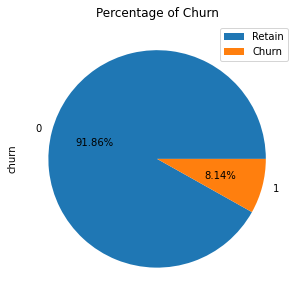

In [35]:
# Checking the % of churn in the entire dataset

plt.figure(figsize = (7,5))
telecom_v6.churn.value_counts().plot(kind='pie', autopct='%1.2f%%').set_title("Percentage of Churn")
plt.legend(['Retain', 'Churn'])
plt.show()

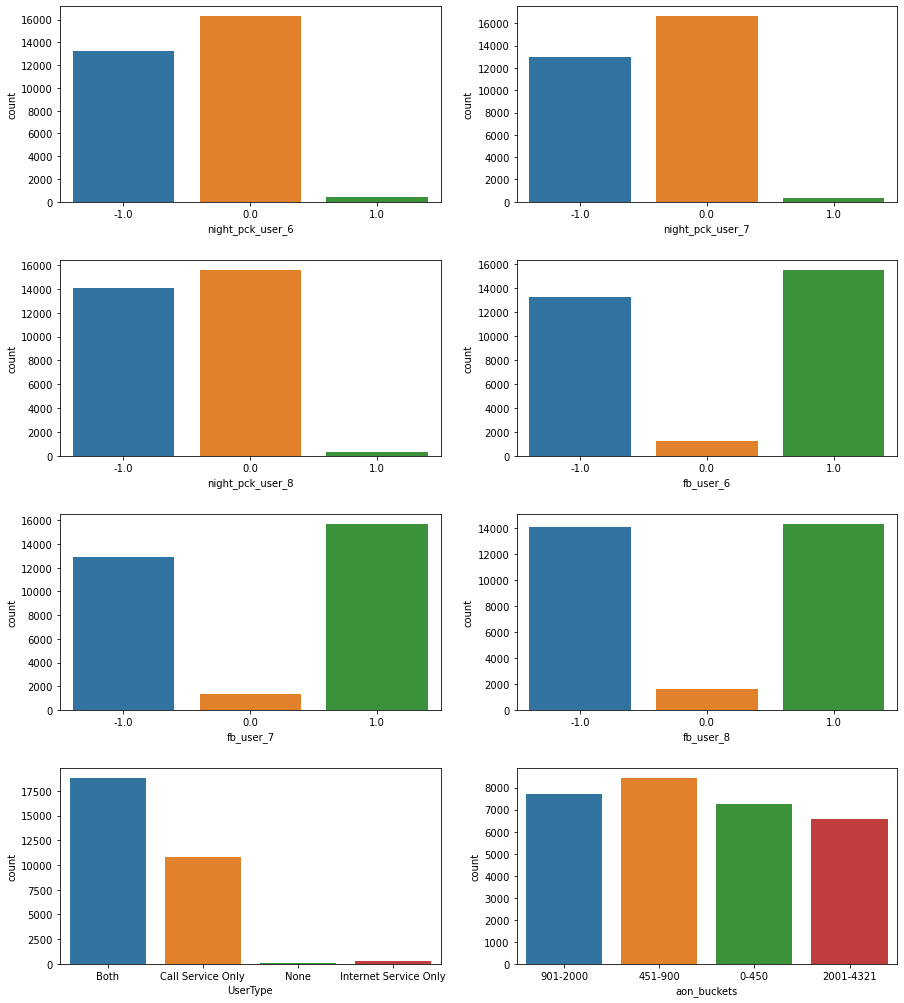

In [36]:
# Univariate Analysis on categorical columns

plt.figure(figsize = (15, 55)) 
for i in enumerate(cat_cols): 
    plt.subplot(12, 2, i[0]+1) 
    plt.subplots_adjust(hspace=0.3) 
    sns.countplot(x = i[1], data = telecom_v6)

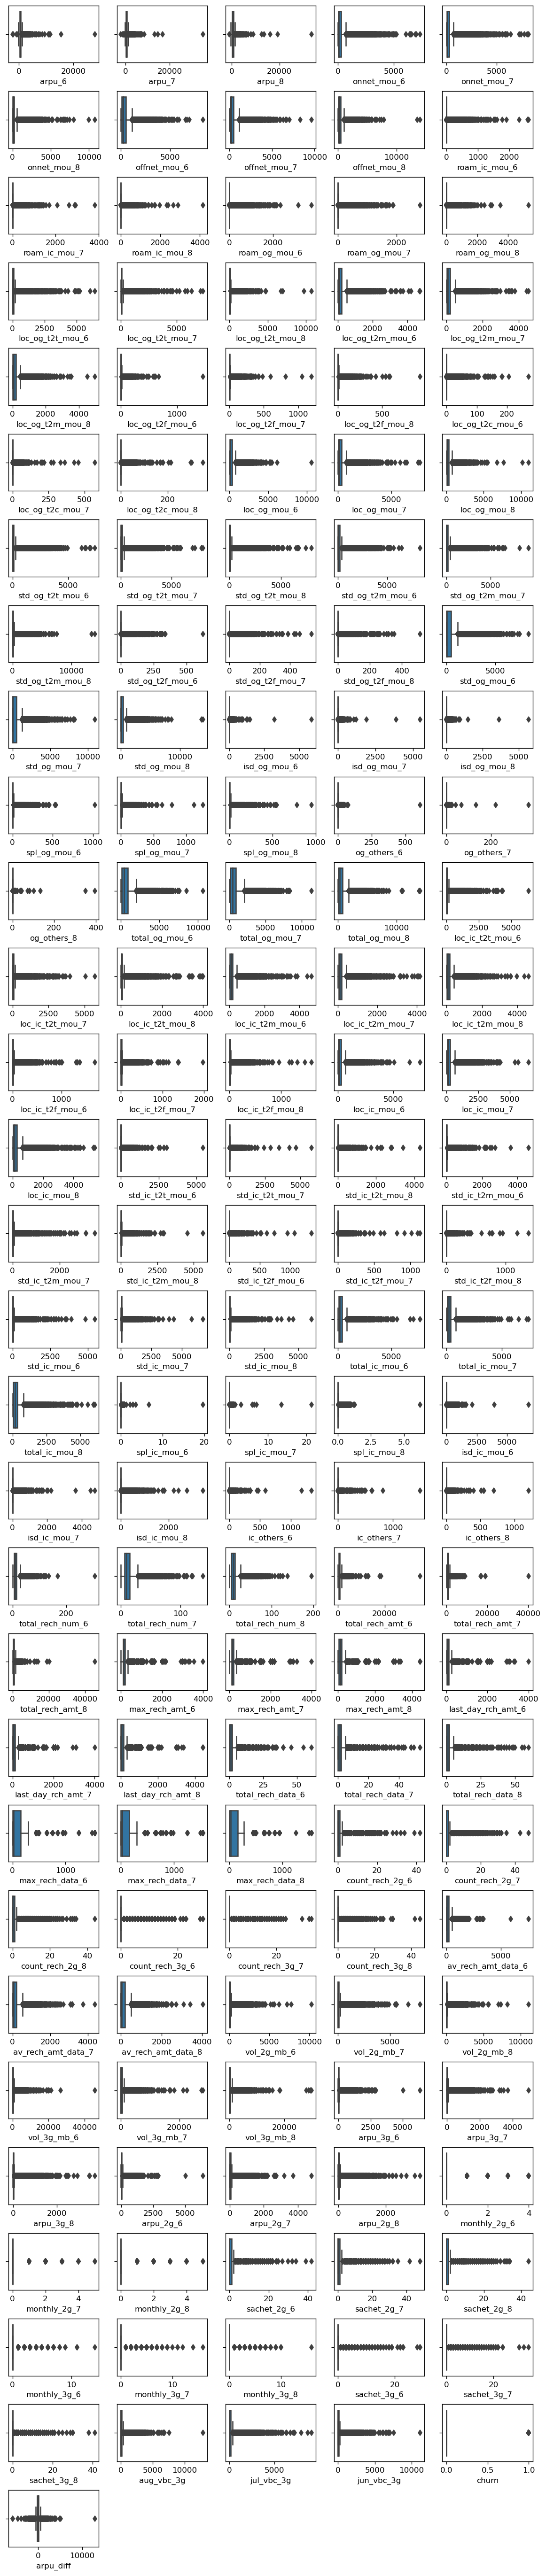

In [37]:
# Creating Univariate boxplots from continuous variables

plt.figure(figsize = (12,100), dpi=120) 
for i in enumerate(num_cols): 
    #print("i = ",i,"x =",num_cols) 
    plt.subplot(50, 5, i[0]+1) 
    plt.subplots_adjust(hspace=0.5) 
    sns.boxplot(x = i[1], data = telecom_v6)

#### All the columns have high outliers based on the plots and we need to do the outlier treatment of the numerical columns

#### Step 3.4.2 : Bivariate Analysis

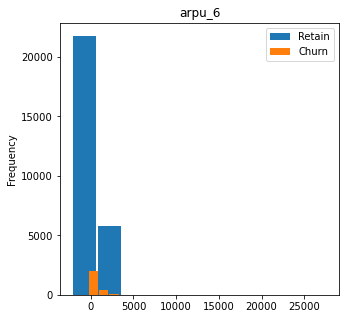

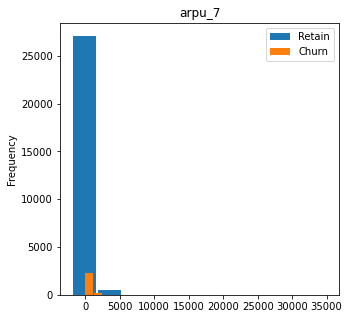

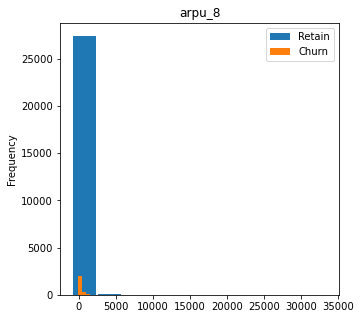

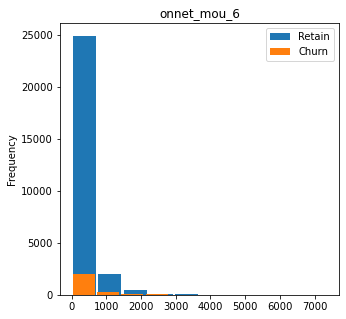

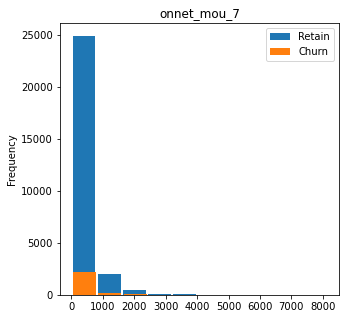

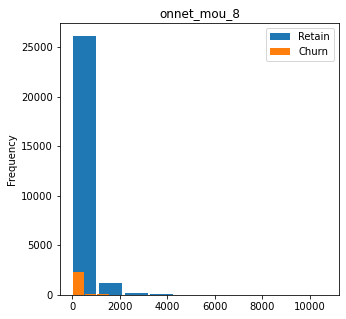

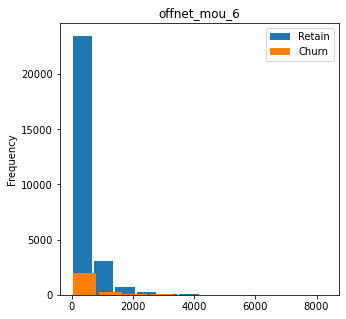

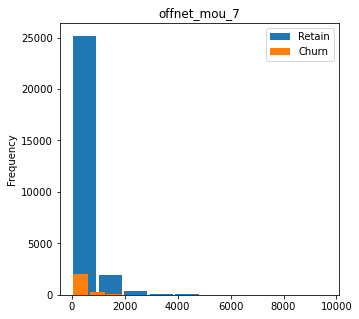

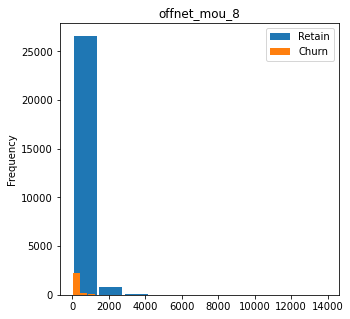

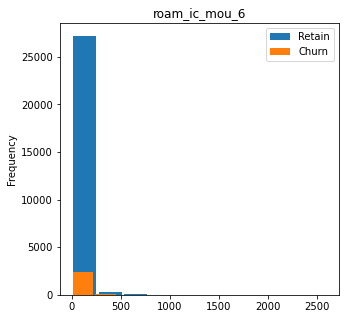

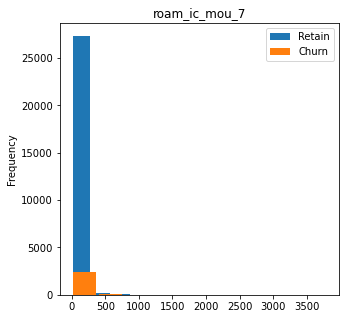

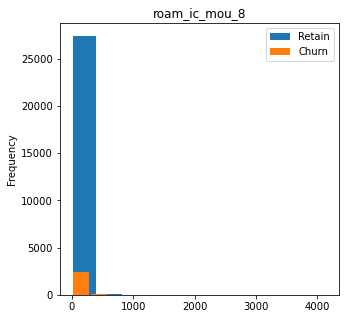

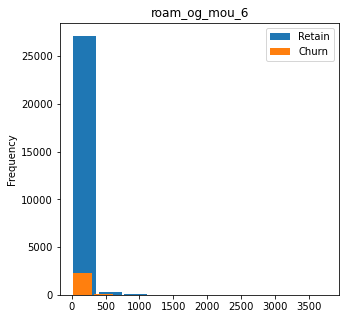

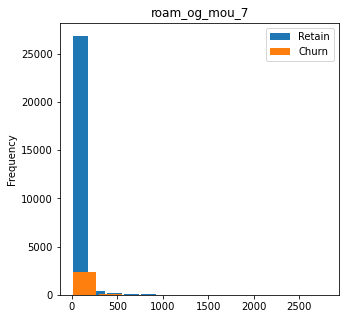

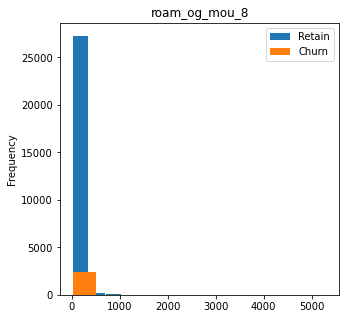

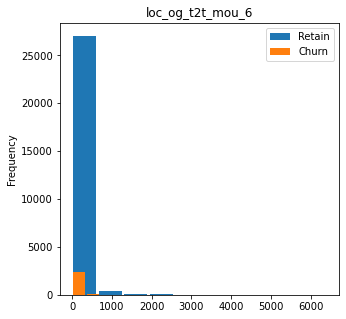

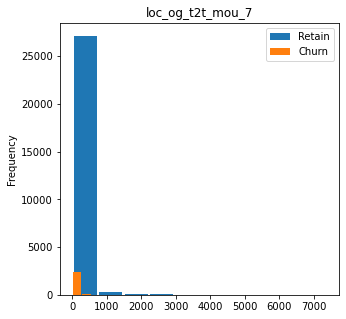

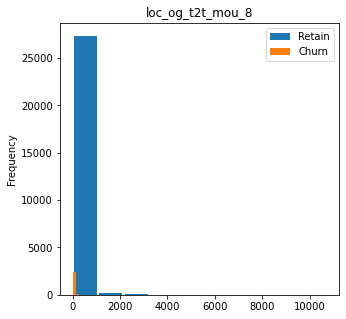

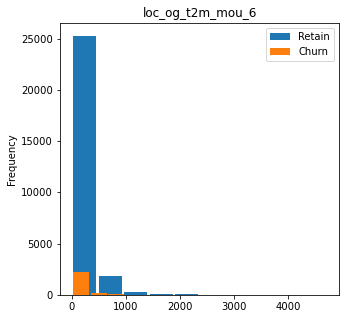

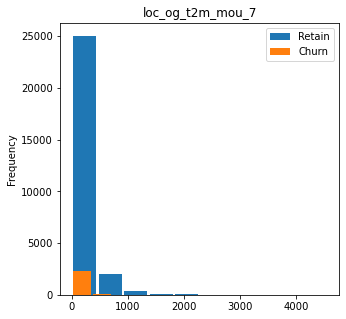

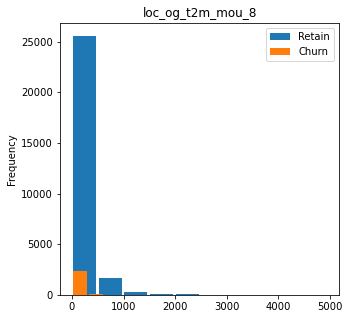

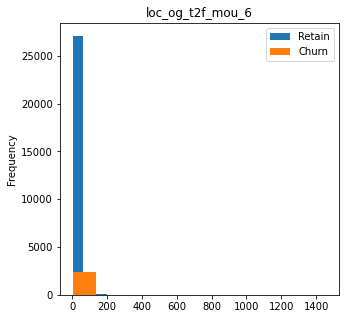

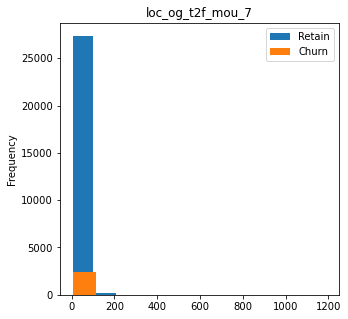

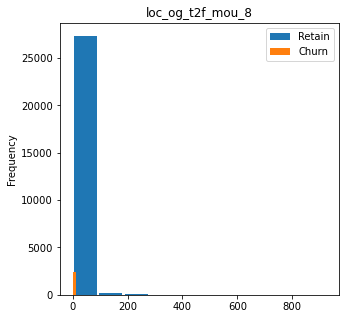

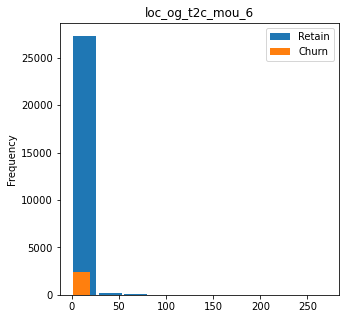

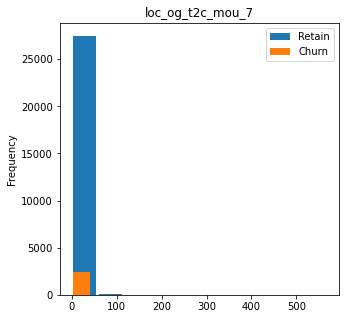

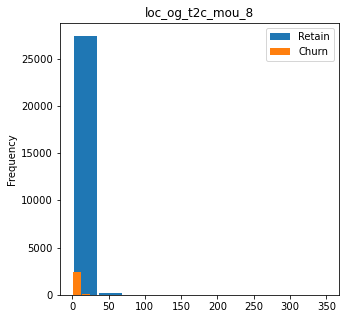

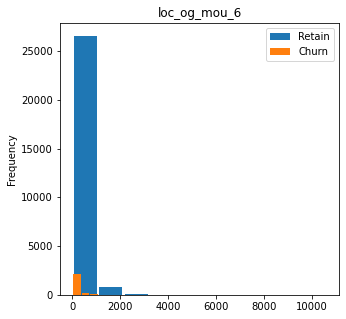

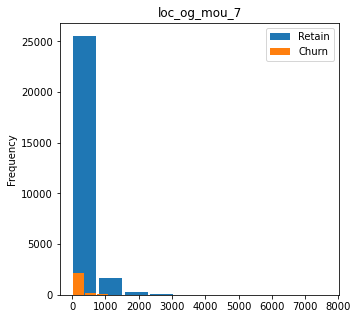

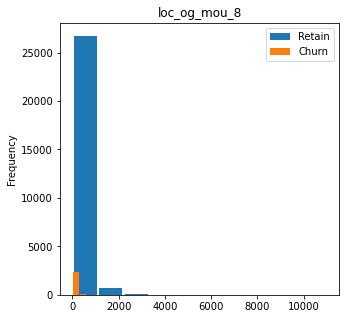

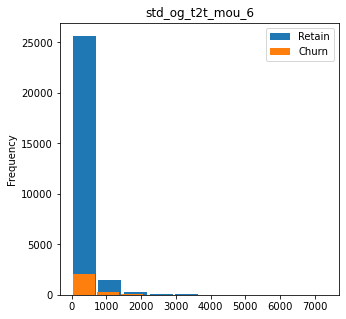

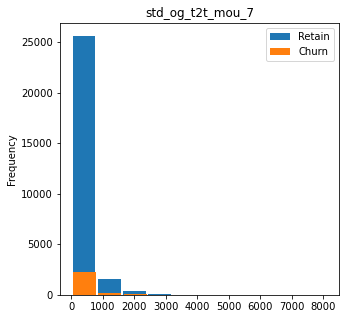

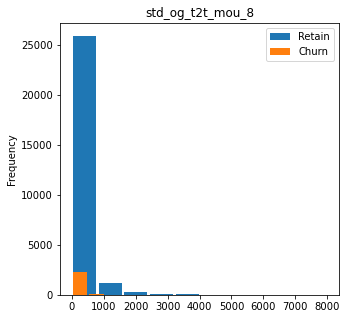

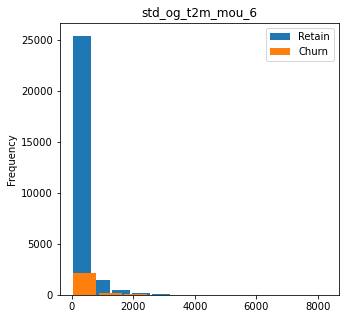

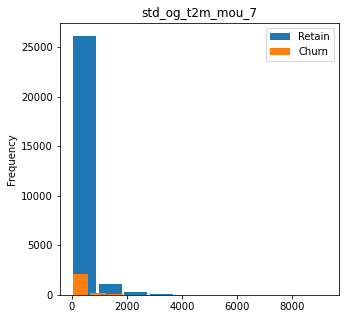

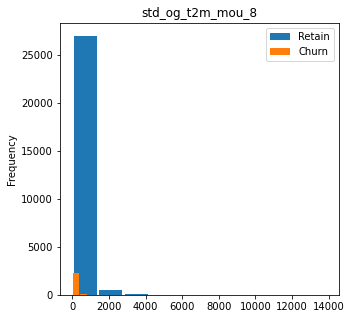

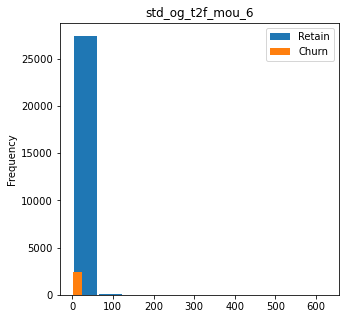

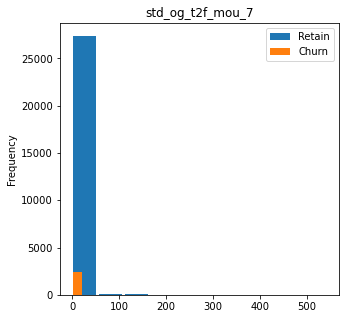

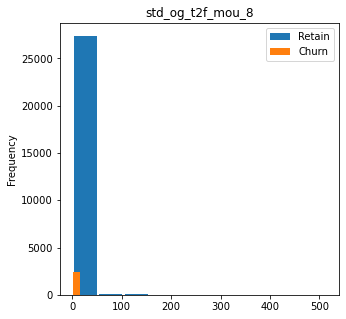

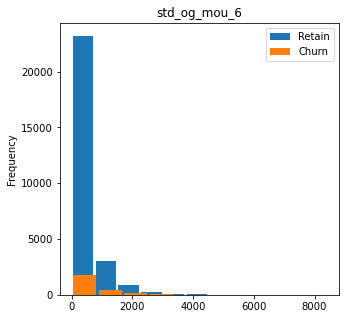

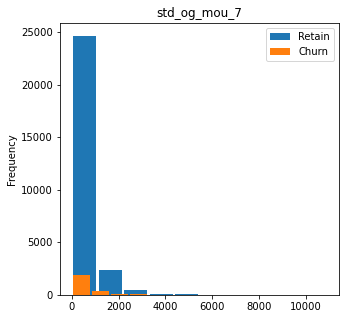

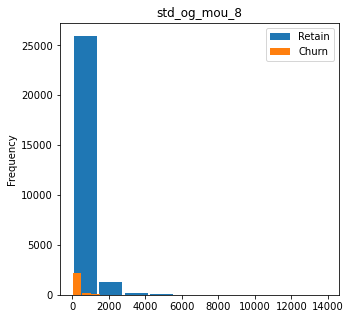

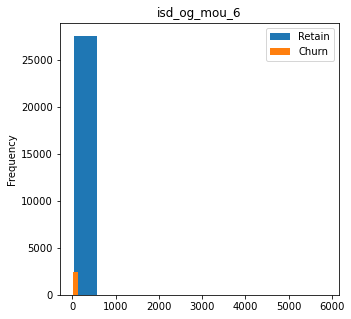

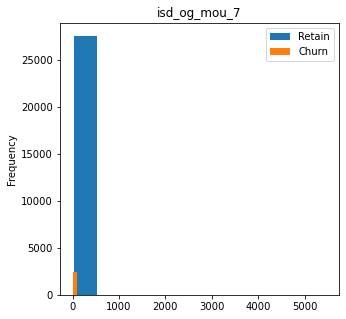

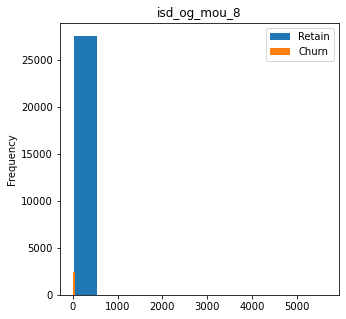

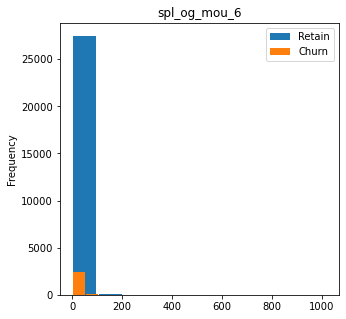

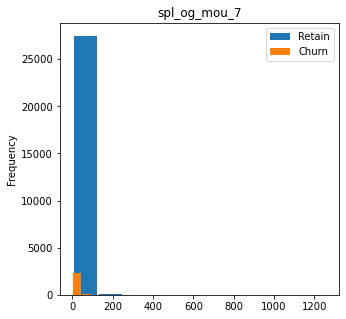

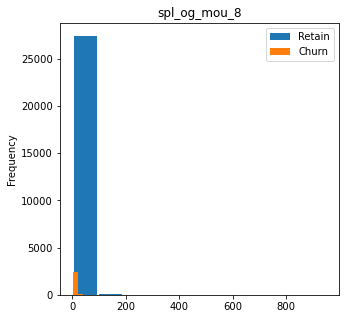

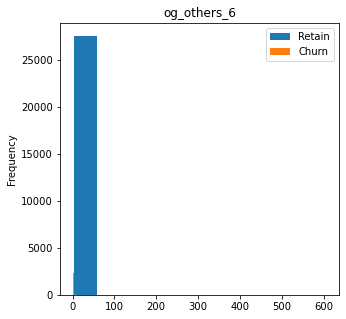

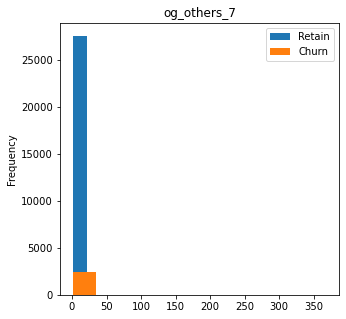

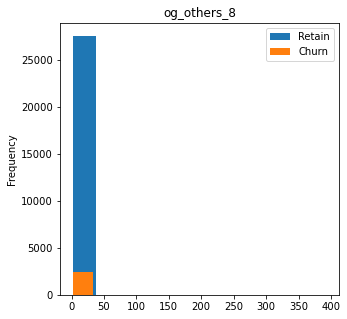

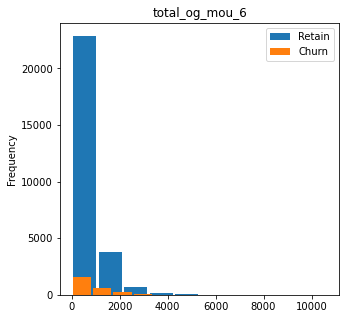

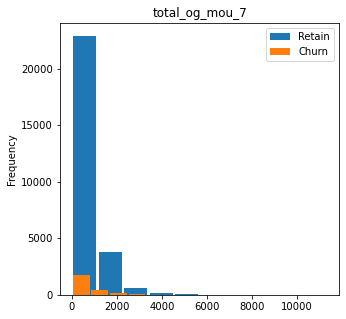

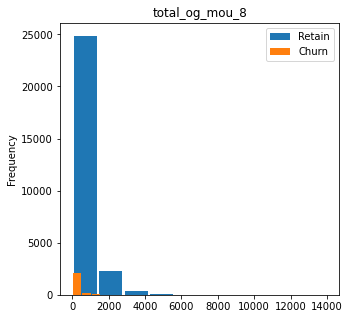

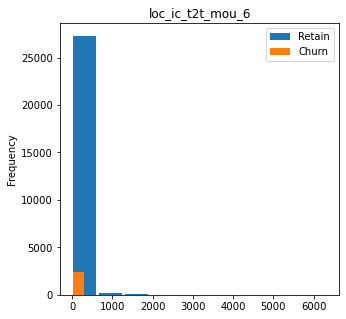

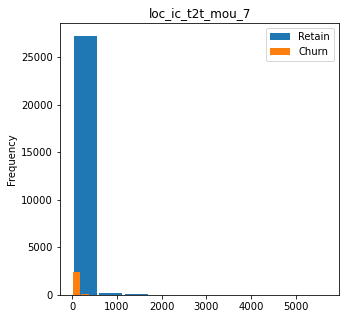

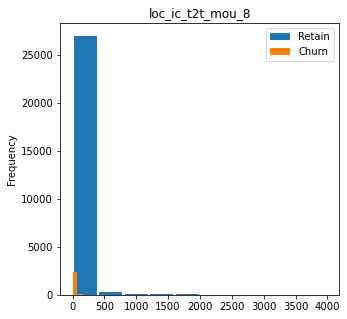

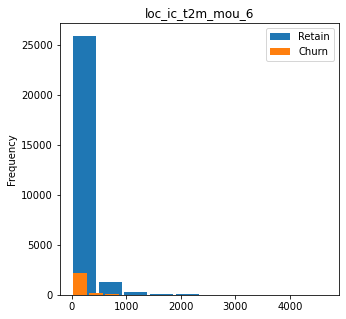

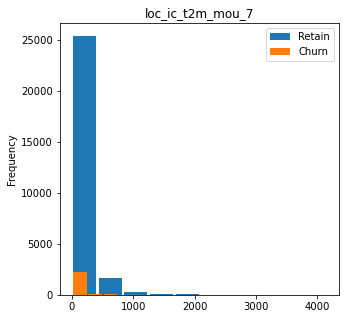

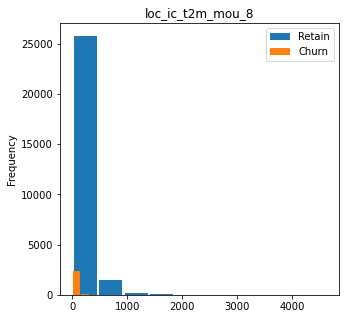

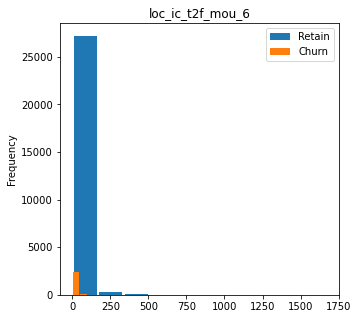

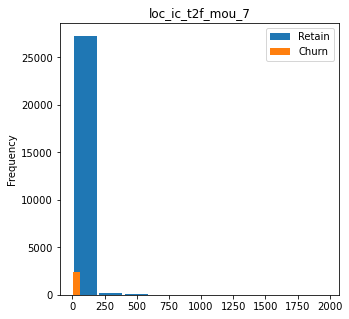

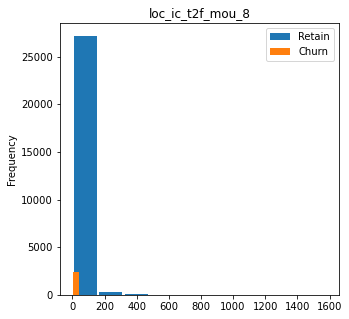

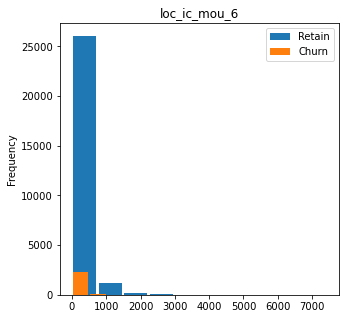

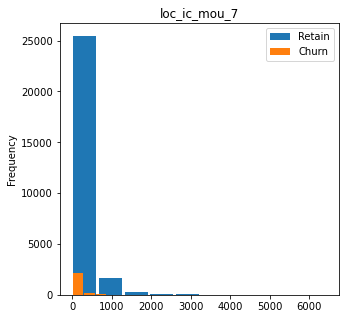

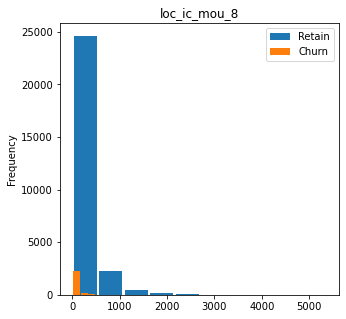

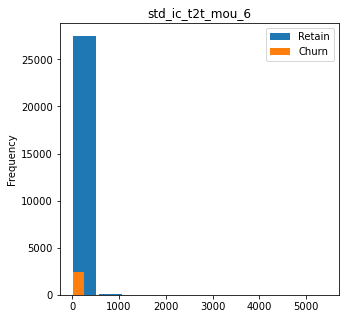

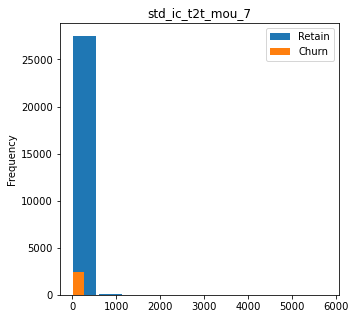

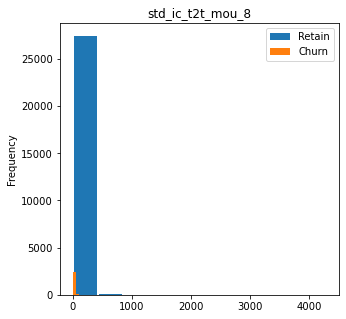

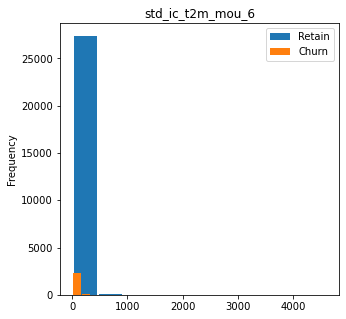

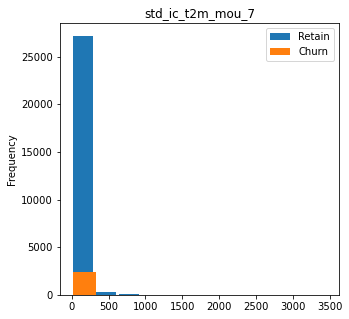

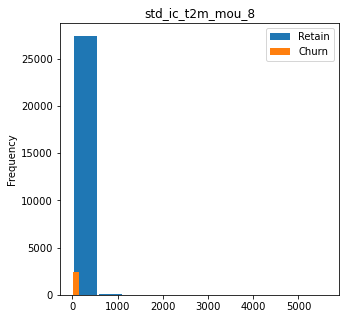

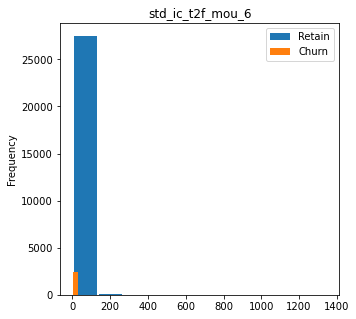

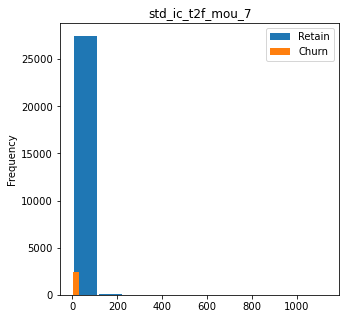

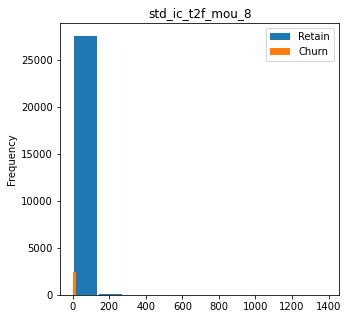

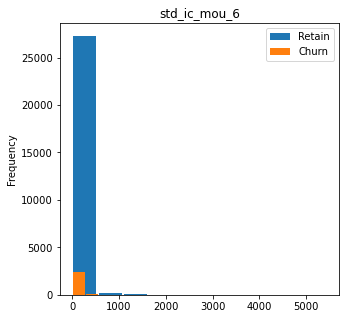

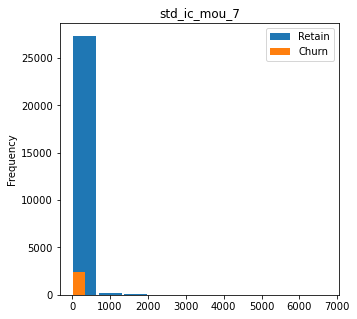

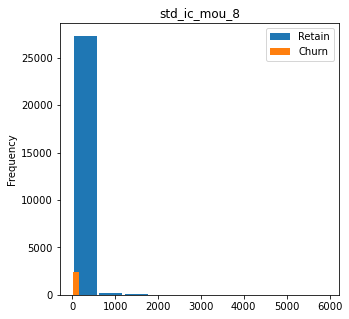

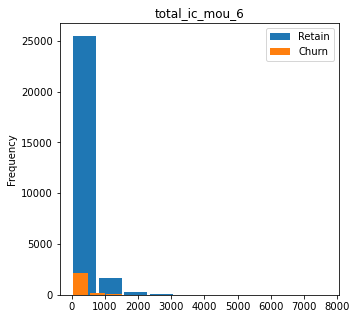

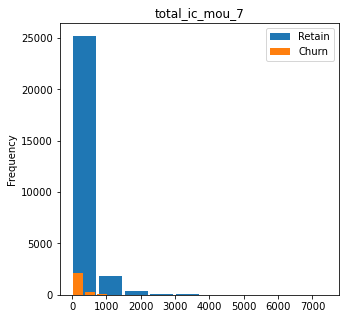

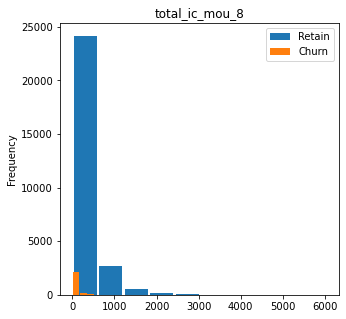

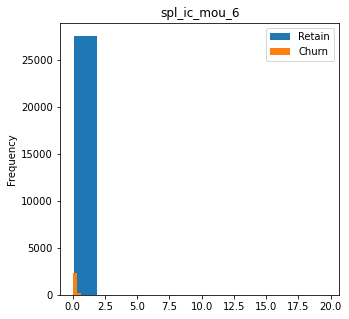

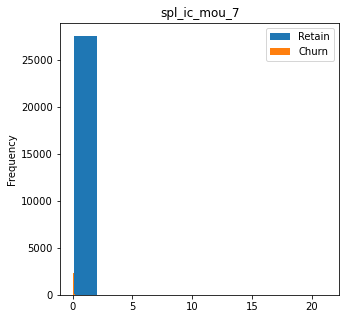

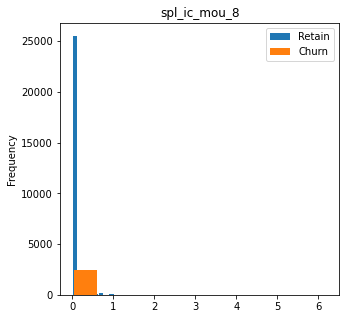

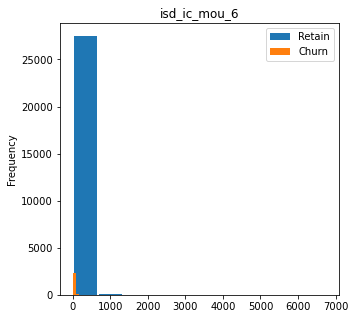

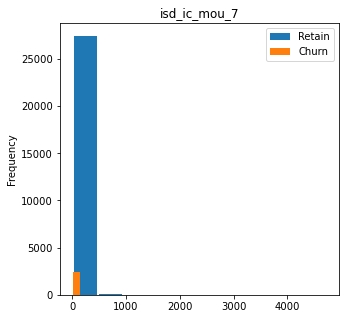

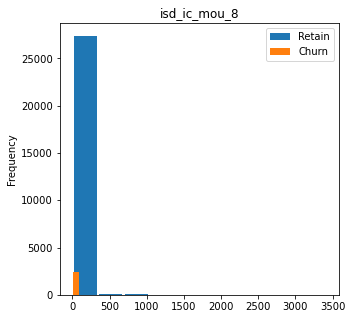

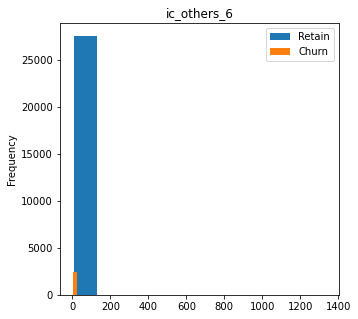

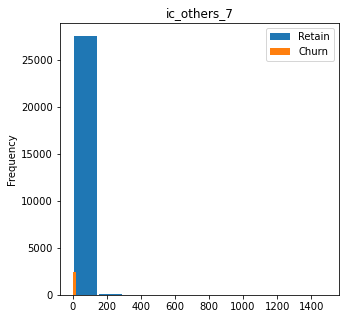

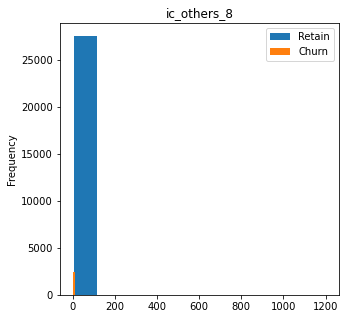

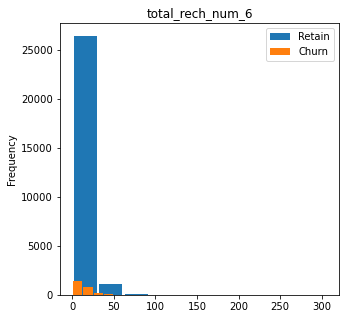

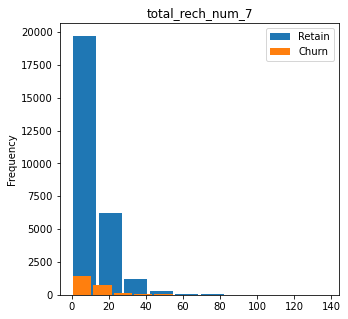

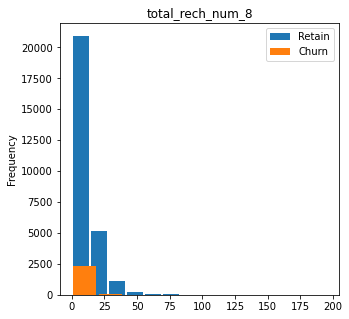

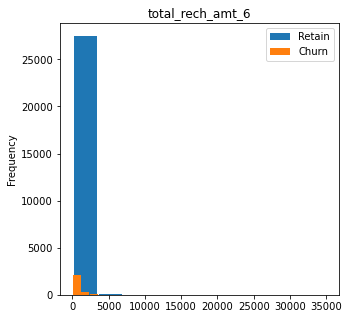

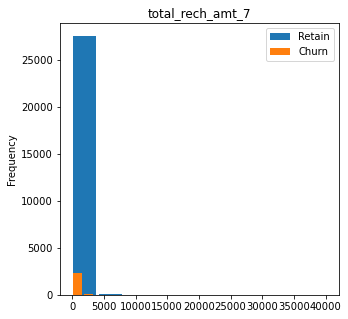

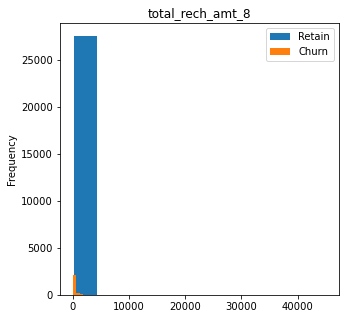

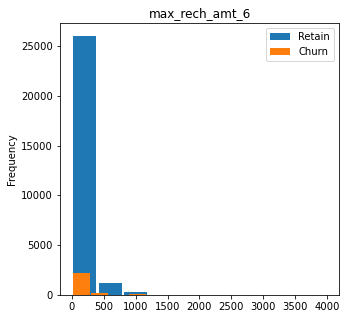

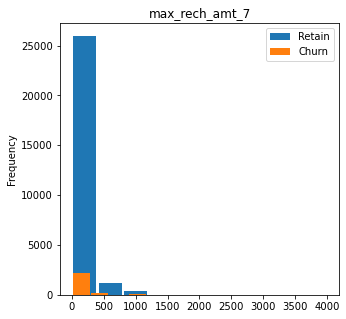

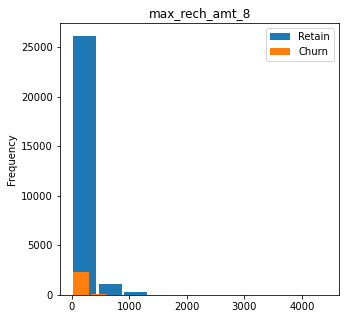

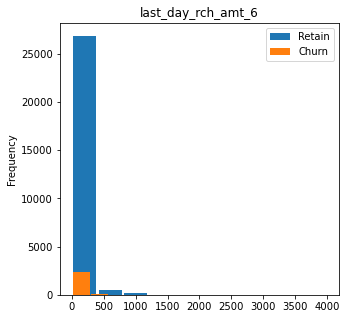

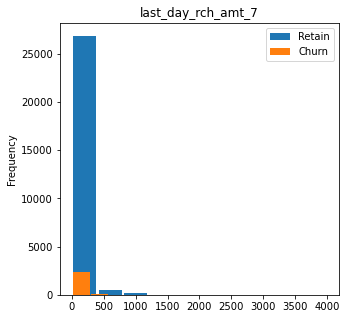

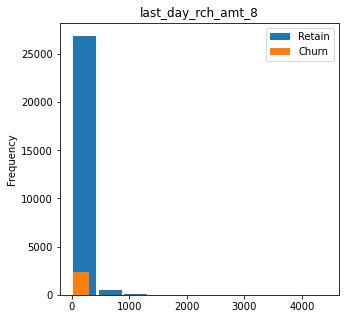

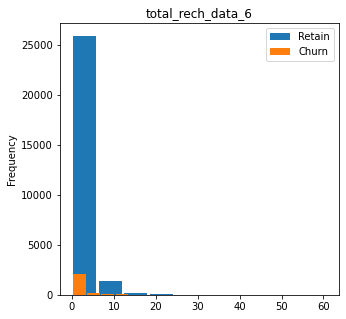

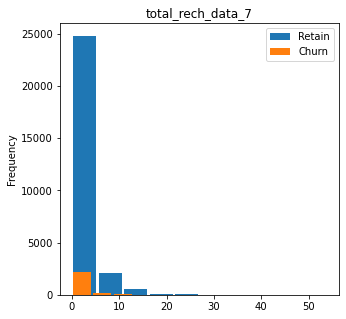

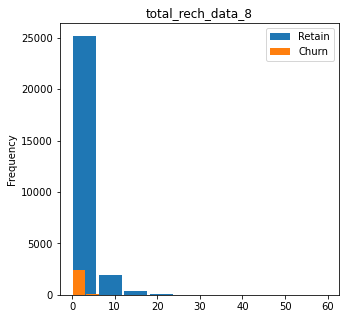

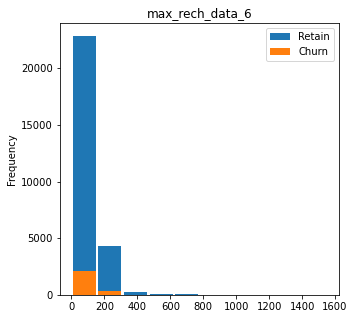

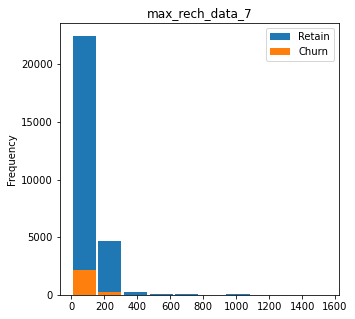

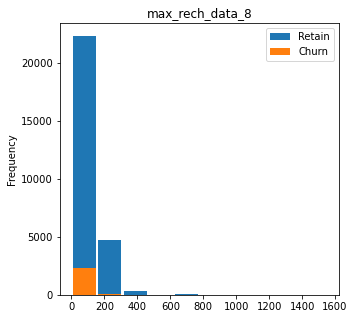

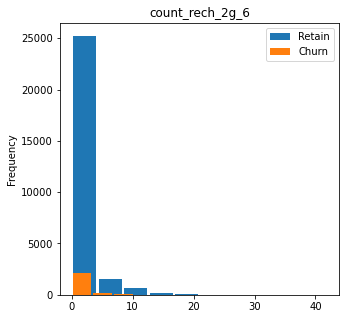

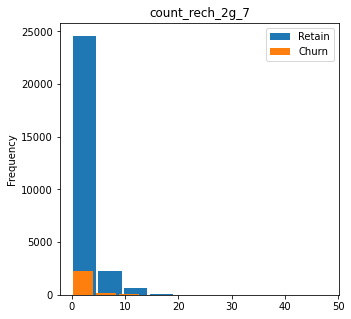

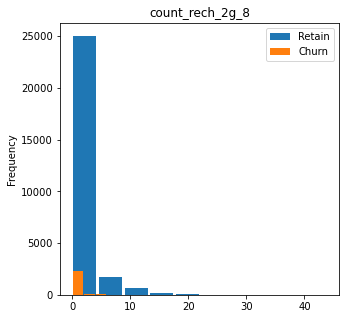

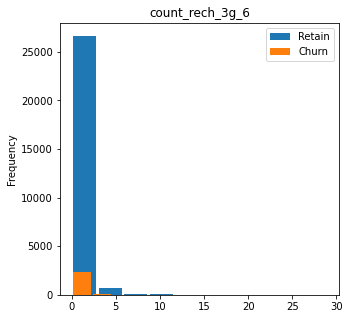

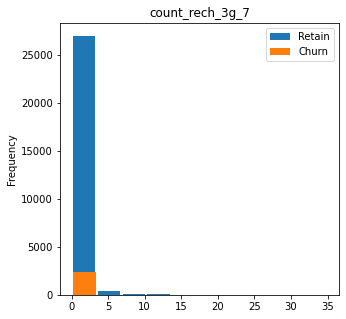

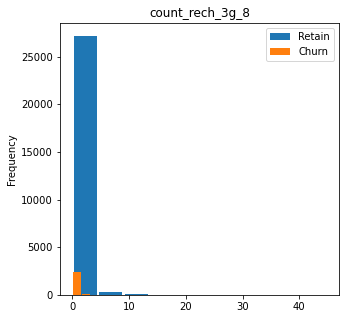

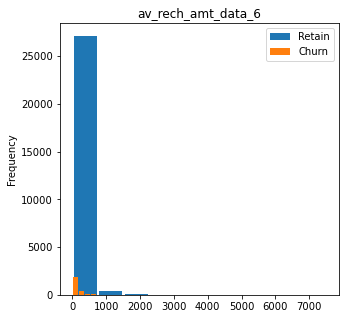

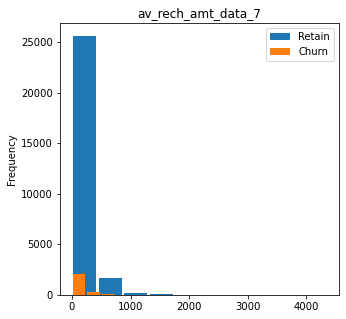

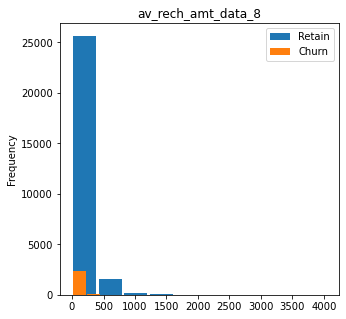

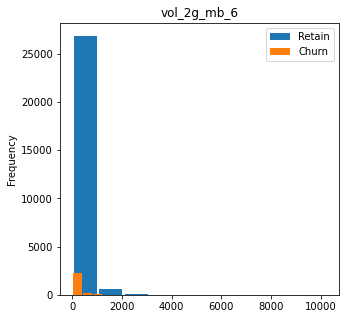

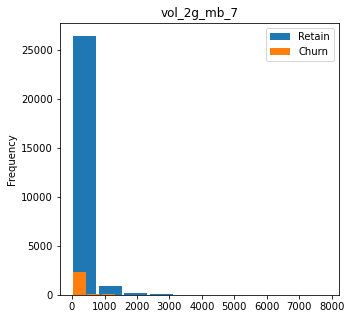

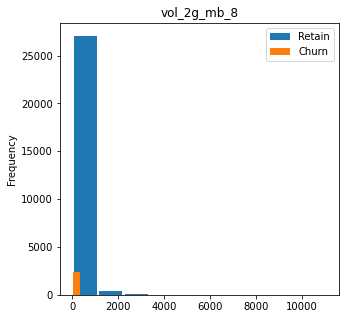

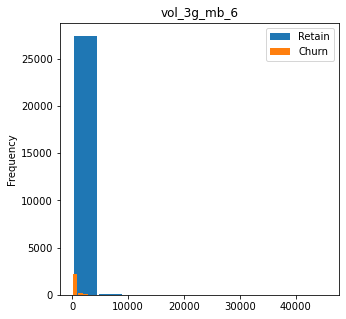

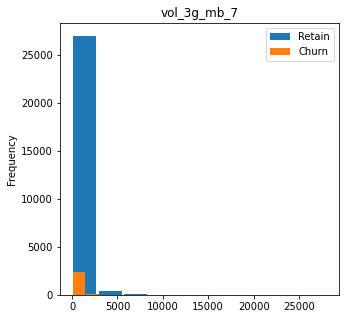

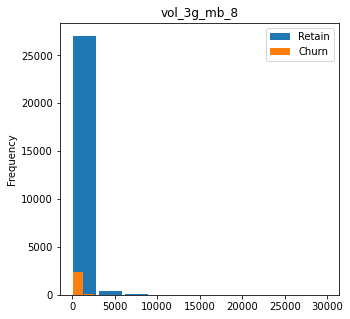

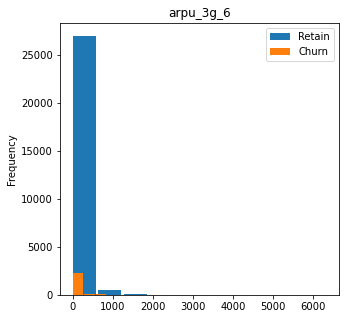

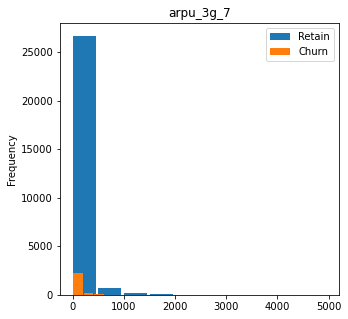

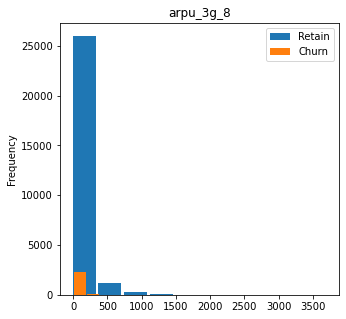

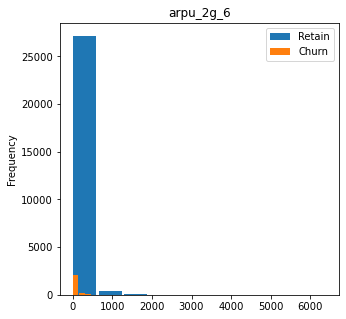

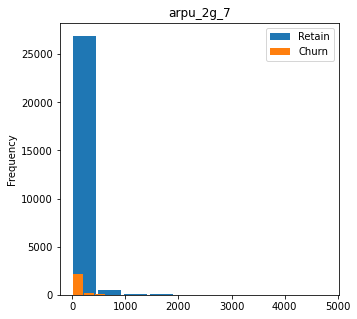

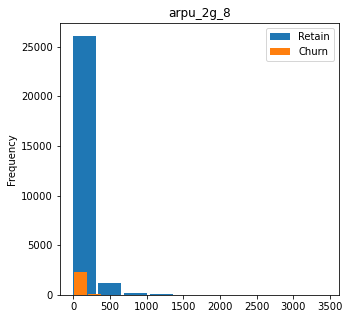

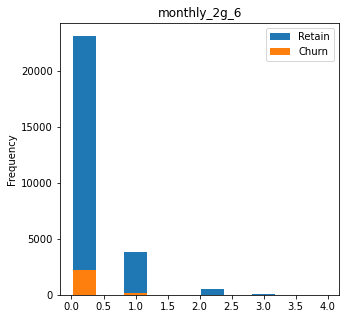

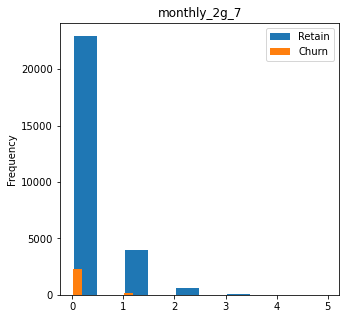

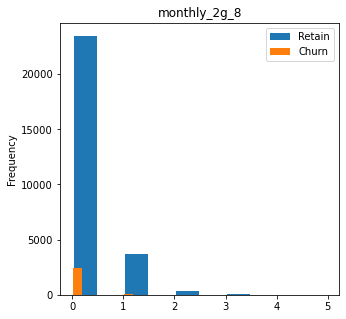

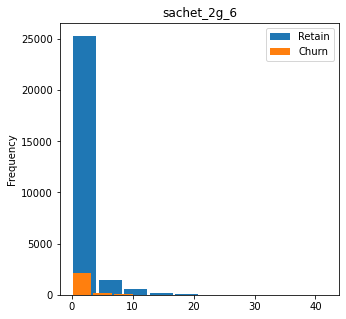

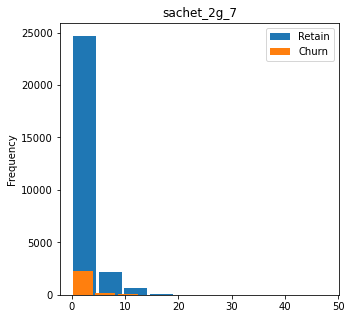

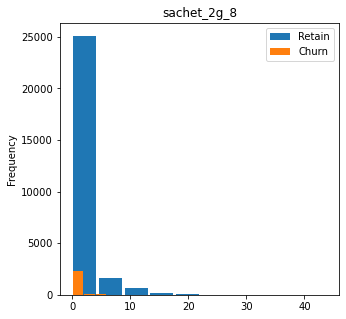

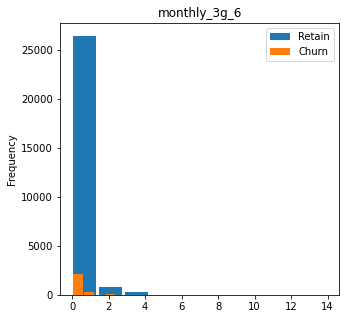

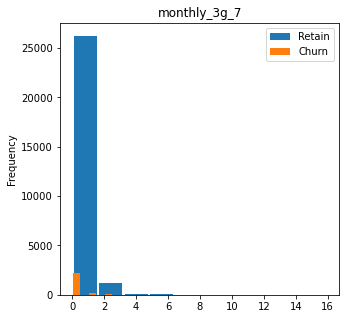

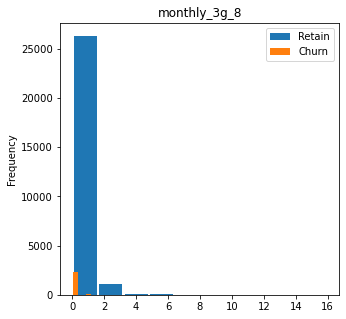

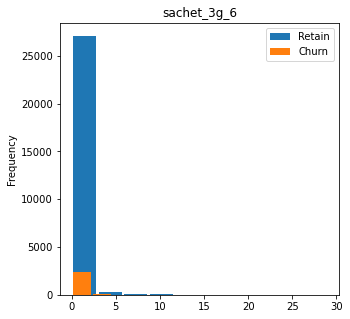

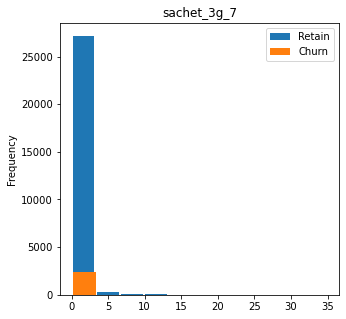

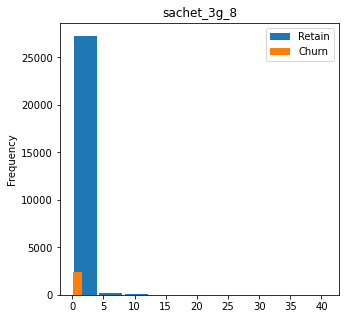

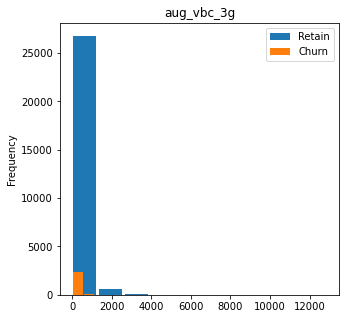

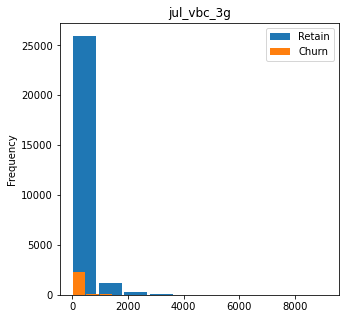

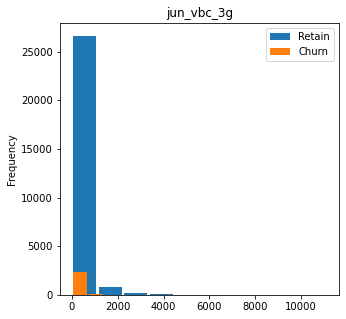

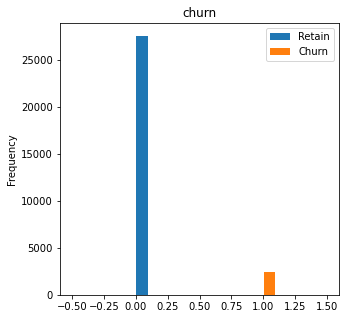

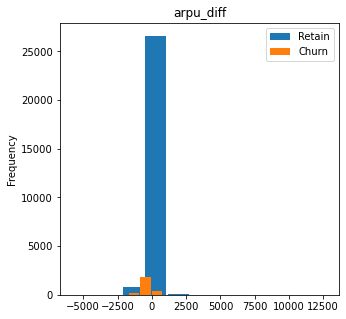

In [38]:
# Creating a function for continuous variables

def contiBplot(x,size = (5,5)):
    plt.figure(figsize= size)
    plt.title(x)
    telecom_v6.groupby('churn')[x].plot(kind = 'hist', rwidth = 0.9)
    plt.legend(['Retain', 'Churn'])
    plt.show()

for i in num_cols:
    contiBplot(i)

#### People giving low arpu and low recharges have higher churn rate

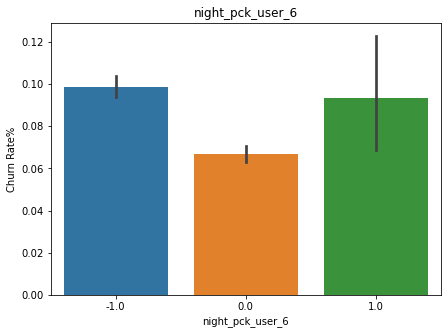

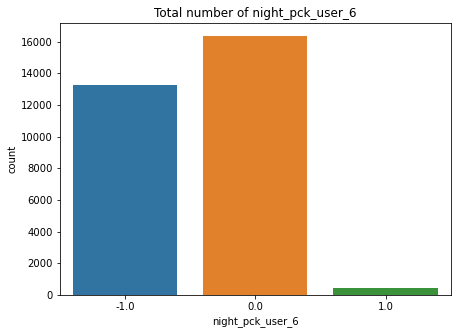

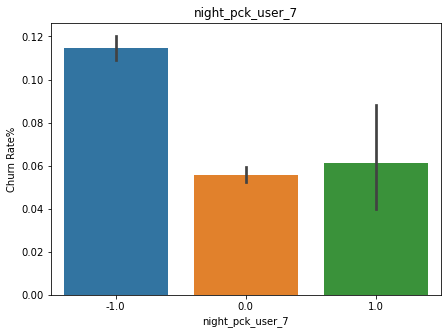

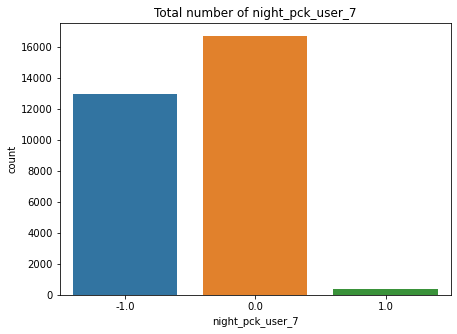

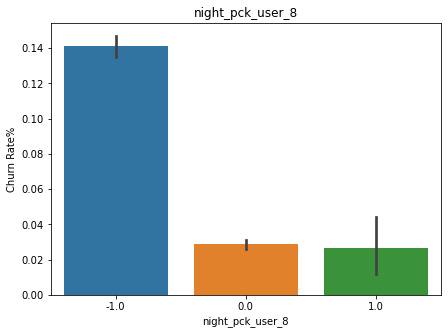

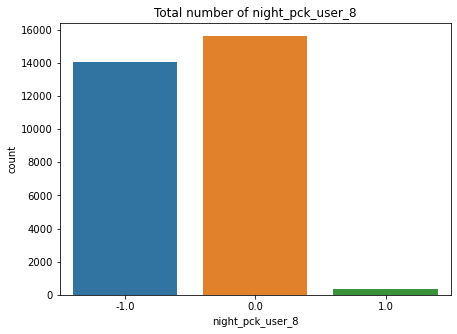

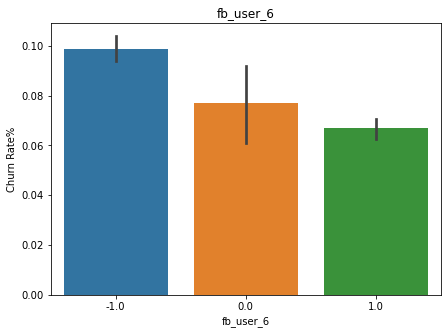

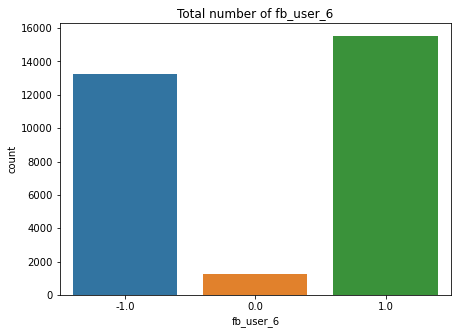

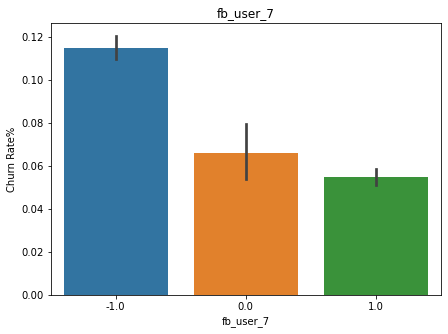

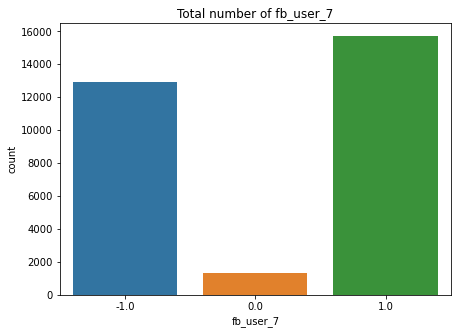

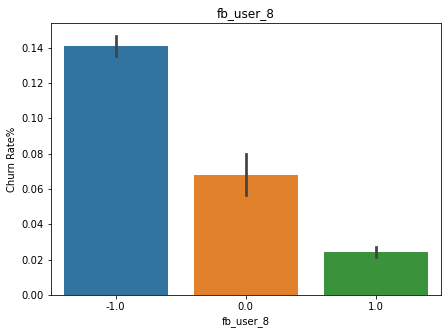

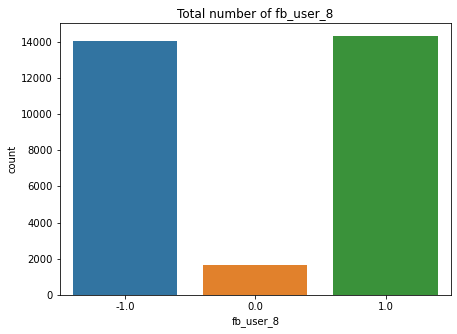

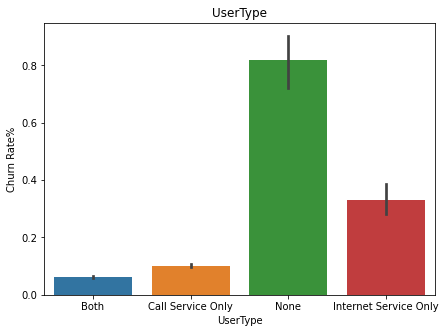

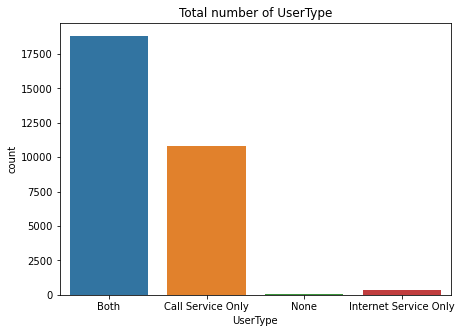

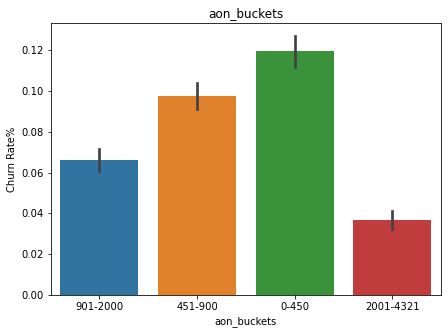

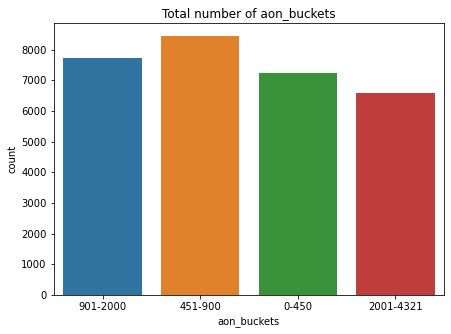

In [39]:
# Bivariate analysis on categorical variable

def bplot(xvalue, size = (7,5)):
    plt.figure(figsize= size)
    chrt = sns.barplot(x=xvalue, y='churn', data=telecom_v6, estimator = np.mean)
    chrt.set_title(xvalue)
    chrt.set_ylabel('Churn Rate%')
    plt.show()
    plt.figure(figsize= size)
    chrt2 = sns.countplot(x=xvalue, data=telecom_v6)
    chrt2.set_title('Total number of '+xvalue)
    plt.show()
    
for i in cat_cols:
    bplot(i)

#### There is high churn rate in the users that do not use Call or Internet services although they are very less people. There is a high churn rate in the customers having low aon buckets (i.e. 0-450)

#### Step 3.4.3: Multivariate Analysis

<AxesSubplot:>

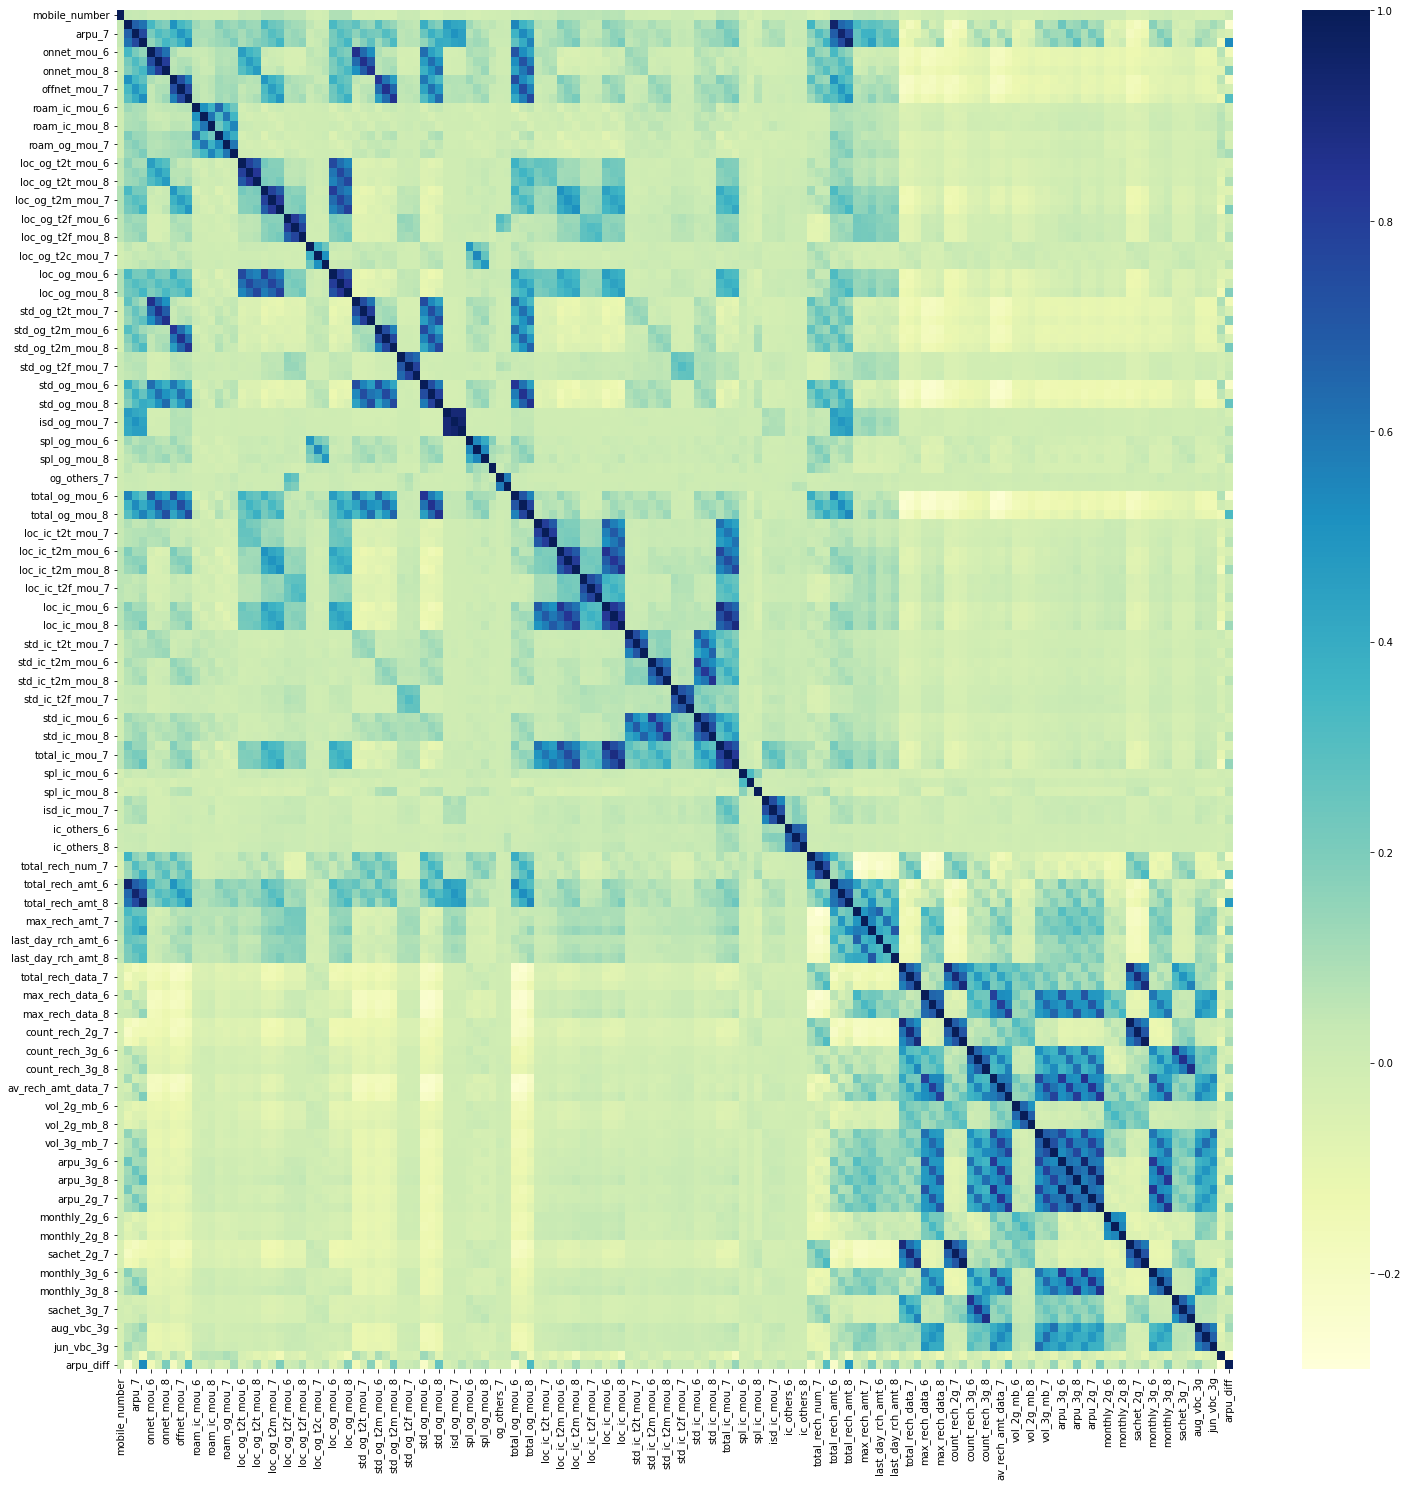

In [40]:
# Creating correlation metric for multivariate analysis

plt.figure(figsize = (25,25))
sns.heatmap(telecom_v6.corr(),cmap="YlGnBu")

#### Mostly all the variables (for the month of June, July and August) have high correlation with each other which is natural since the usage or amount mostly remains the same per user. However, there is a high correlation amongst 3g volume, 2g volume and arpu. We will deal with this while doing PCA in high accuracy models and VIF in high interpretability models.

#### Step 3.5:  Outlier Treatment

In [41]:
telecom_v6.describe([0.01,0.05,0.25,0.50,0.75,0.9,0.95])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
5%      7.000126e+09    112.510000    114.273000      9.550000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.210000      0.050000      0.000000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.152086      19.865615         84.484753         85.674287   
std        96.100428     104.719009        228.794004        240.525999   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        190.840000   
95%       104.240000     100.510000        322.740000        324.390000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc

In [42]:
# Creating another variable for numerical columns to remove churn

num_cols2 = []
for i in num_cols:
    if i == 'churn':
        continue
    else:
        num_cols2.append(i)
num_cols2

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [43]:
# Outlier Treatment of the continuous variables by capping the outliers to percentile 1 and percentile 99

telecom_v7 = telecom_v6[:]

for col in num_cols2:
    percentiles = telecom_v7[col].quantile([0.01, 0.99]).values
    telecom_v7[col] = np.clip(telecom_v7[col], percentiles[0], percentiles[1])

In [44]:
telecom_v7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 155 entries, mobile_number to UserType
dtypes: float64(145), int64(2), object(8)
memory usage: 35.7+ MB


In [45]:
# Checking the outlier treatment is done correctly

telecom_v7.describe([0.01,0.05,0.25,0.50,0.75,0.95,0.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    548.809784    551.084737    498.243103    252.166035   
std     6.908784e+05    358.130151    360.433210    383.295094    403.510223   
min     7.000000e+09      1.000000      0.700000      0.000000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
5%      7.000126e+09    112.510000    114.273000      9.550000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09   1985.115000   1999.500000   1986.622000   2151.740000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     258.623657    224.895572    365.893079    369.516995    325.038955   
std      418.167038    390.856953    434.200835    443.919067    409.754119   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.210000      0.050000      0.000000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       13.572928       9.636307       9.763929      22.732495   
std        49.336952      38.699269      38.946961      79.312550   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max       342.440000     280.460000     282.190000     530.710000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       16.688892      15.985223         76.276691         76.684236   
std        62.862903      60.492319        149.890333        150.825195   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
95%       104.240000     100.510000        322.740000        324.390000   
99%       438.590000     427.030000       1006.360000       1018.530000   
max       438.590000     427.030000       1006.360000       1018.530000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc

#### Step 3.6:  Dummy Variable Creation

In [46]:
telecom_v8 = telecom_v7[:]
dummy1 = pd.get_dummies(telecom_v8[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','aon_buckets','UserType']], drop_first=True)
dummy1

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
0                         1                     0                     1   
7                         0                     0                     0   
8                         0                     0                     1   
21                        0                     0                     0   
23                        0                     0                     1   
...                     ...                   ...                   ...   
99981                     1                     0                     1   
99984                     1                     0                     1   
99986                     1                     0                     1   
99988                     0                     0                     1   
99997                     1                     0                     1   

       night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                         0                     1                     0   
7                         0                     0                     0   
8                         0                     1                     0   
21                        0                     0                     0   
23                        0                     1                     0   
...                     ...                   ...                   ...   
99981                     0                     1                     0   
99984                     0                     1                     0   
99986                     0                     1                     0   
99988                     0                     1                     0   
99997                     0                     1                     0   

       fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  \
0                  0              1              0              1   
7                  0              0              0              0   
8                  0              0              0              1   
21                 0              0              0              0   
23                 0              0              0              1   
...              ...            ...            ...            ...   
99981              0              1              0              1   
99984              0              1              0              1   
99986              0              1              0              1   
99988              0              0              0              1   
99997              0              1              0              1   

       fb_user_8_0.0  fb_user_8_1.0  aon_buckets_2001-4321  \
0                  0              1                      0   
7                  0              0                      0   
8                  0              1                      0   
21                 0              0                      0   
23                 0              1                      0   
...              ...            ...                    ...   
99981              0              1                      0   
99984              0              1                      0   
99986              0              1                      1   
99988              0              1                      0   
99997              0              1                      0   

       aon_buckets_451-900  aon_buckets_901-2000  UserType_Call Service Only  \
0                        0                     1                           0   
7                        1                     0                           1   
8                        0                     0                           0   
21                       1                     0                           1   
23                       1                     0                           0   
...                    ...                   ...                         ...   
99981                    1                     0                       

In [47]:
# Creating a dummy variable for categorical variables and dropping the first one.

telecom_v8 = telecom_v7[:]
dummy1 = pd.get_dummies(telecom_v8[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','aon_buckets','UserType']], drop_first=True)

# Adding the results to the master dataframe
telecom_v8 = pd.concat([telecom_v8, dummy1], axis=1)
telecom_v8.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  1986.622        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [48]:
telecom_v8.shape

(30001, 173)

In [49]:
telecom_v8 = telecom_v8.drop(columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','aon_buckets','UserType'])
telecom_v8.shape

(30001, 165)

In [50]:
telecom_v8.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  1986.622        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

#### Step 3.7 :Train Test Split

In [51]:
X = telecom_v8.drop(['churn','mobile_number'], axis = 1)
y = telecom_v8['churn']

In [52]:
# Splitting the Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 163)
(9001, 163)
(21000,)
(9001,)


#### Step 3.8 : Scaling

In [53]:
# Using the standard scaler

scaler = StandardScaler()

X_train[num_cols2] = scaler.fit_transform(X_train[num_cols2])

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
39186  1.507168  0.990151  0.244555    -0.612269    -0.599077    -0.561633   
39833 -0.099874 -0.667632 -0.352147    -0.265757    -0.499672    -0.470048   
38778 -0.703005 -0.660494 -0.484595    -0.453849    -0.434493    -0.361356   
43026  1.924553 -0.634216  0.539168     4.729925    -0.222216     1.206744   
12271 -0.311549 -0.263592 -0.613082    -0.582547    -0.508952    -0.512994   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
39186     -0.494020     -0.474984     -0.553666       0.307339       0.429025   
39833     -0.103927     -0.321518     -0.145634      -0.274045      -0.250151   
38778     -0.075946     -0.163288     -0.272591       0.081892       0.826952   
43026      0.239078     -0.381232      0.560540      -0.274045       0.762754   
12271     -0.413489     -0.155058     -0.593652      -0.274045      -0.250151   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
39186       0.555328      -0.209458      -0.040451      -0.102499   
39833      -0.250809      -0.287007      -0.267810      -0.265965   
38778       1.521865       0.003833       0.069434       1.005459   
43026       0.340255      -0.287007       0.262010       0.124630   
12271      -0.250809      -0.287007      -0.267810      -0.265965   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
39186         -0.473176         -0.460140         -0.473229         -0.641161   
39833         -0.082353         -0.306915         -0.211024          0.556018   
38778         -0.366324         -0.432257         -0.314605          0.241150   
43026         -0.235388         -0.293040          4.125036          0.526861   
12271         -0.417004         -0.319139         -0.420817          0.111609   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
39186         -0.609265         -0.621942         -0.324597         -0.413538   
39833          0.101304          0.316457          0.471533         -0.039637   
38778          0.287342         -0.095753         -0.183547          0.090290   
43026         -0.061884          1.034045         -0.305693          1.180954   
12271          0.556000         -0.336777         -0.126837          1.400386   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
39186         -0.405331         -0.342627          1.091336         -0.080072   
39833          2.257365         -0.342627          3.366183         -0.335754   
38778         -0.405331         -0.342627         -0.348726         -0.335754   
43026          1.056300         -0.342627         -0.348726          0.217449   
12271         -0.129348         -0.342627         -0.348726         -0.335754   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
39186     -0.669303     -0.650920     -0.654914         -0.451844   
39833      0.320564     -0.101507      0.188784         -0.220375   
38778     -0.041624     -0.033872     -0.239067         -0.326541   
43026      0.198832     -0.148600      2.519452          4.970669   
12271     -0.146617      0.249897     -0.432799         -0.441052   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
39186         -0.455751         -0.415636         -0.478145         -0.453221   
39833         -0.402741         -0.415636         -0.395512         -0.429964   
38778         -0.287334         -0.335025         -0.196512         -0.333190   
43026         -0.089302         -0.312260         -0.013336         -0.482334   
12271         -0.417741         -0.380376         -0.485600         -0.482334   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
39186         -0.412249         -0.240954         -0.237083         -0.235265   
39833         -0.393819         -0.240954          1.040286         -0.235265   
38778         -0.333947         

#### Step 3.9:  Tranforming the test data

In [54]:
# Fitting the scale on the test data

X_test[num_cols2]=scaler.transform(X_test[num_cols2])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
20296 -0.027286 -0.041915 -0.569135    -0.586828    -0.605703    -0.553590   
8279  -1.316907 -0.953951 -1.097164    -0.586903    -0.596566    -0.549837   
72269  0.471043  0.468207  0.330380     0.239375    -0.075069     0.020558   
65602 -0.253697 -0.182237 -0.104401    -0.428707    -0.463387    -0.278734   
42758  0.156503 -0.415253 -1.054820     1.004914     0.297942    -0.452941   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
20296     -0.719086     -0.797371     -0.738237      -0.274045      -0.250151   
8279      -0.782769     -0.782878     -0.784075      -0.158411      -0.250151   
72269      1.043971      0.979343      1.329645      -0.274045      -0.250151   
65602     -0.039991     -0.221660     -0.249916      -0.274045      -0.250151   
42758     -0.492660     -0.551360     -0.779931      -0.274045      -0.250151   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
20296      -0.250809      -0.287007      -0.267810      -0.265965   
8279       -0.163225      -0.237796      -0.105275      -0.182077   
72269      -0.250809      -0.287007      -0.267810      -0.265965   
65602      -0.250809      -0.287007      -0.267810      -0.265965   
42758       0.639026      -0.287007      -0.267810       0.394366   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
20296         -0.485615         -0.487759         -0.450202         -0.531884   
8279          -0.456636         -0.502625         -0.487483         -0.737193   
72269          1.562650          0.567769          0.654317          2.772302   
65602         -0.066143         -0.222935          0.329540          0.358009   
42758         -0.450879         -0.466814         -0.508608         -0.280336   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
20296         -0.734101         -0.650425         -0.150830         -0.304543   
8279          -0.735771         -0.718498         -0.411117         -0.413538   
72269          2.571316          2.455812         -0.153011         -0.413538   
65602          0.054032          0.064178         -0.280973         -0.102435   
42758         -0.202558         -0.706361         -0.411117         -0.413538   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
20296         -0.275048         -0.335226         -0.348726         -0.335754   
8279          -0.405331          4.366787          1.892370          0.298802   
72269         -0.205667         -0.342627         -0.348726          1.997923   
65602         -0.405331         -0.342627         -0.071964         -0.335754   
42758         -0.405331          2.040450          2.353640         -0.335754   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
20296     -0.596847     -0.740274     -0.658036         -0.416187   
8279      -0.727693     -0.753007     -0.724683         -0.439728   
72269      2.488471      1.896866      1.873734         -0.351952   
65602      0.167997     -0.095527      0.149683         -0.415842   
42758     -0.428512     -0.389892     -0.726035          1.408949   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
20296         -0.449421         -0.415636         -0.472289         -0.458461   
8279          -0.434888         -0.408958         -0.485600         -0.481452   
72269         -0.278527         -0.196716         -0.353552         -0.190462   
65602         -0.395997         -0.412728         -0.165863         -0.236684   
42758          0.581695         -0.385125         -0.369548         -0.459103   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
20296         -0.435232         -0.060652         -0.237083         -0.042790   
8279          -0.452775         -0.240954         -0.237083         -0.235265   
72269          0.159369         

In [55]:
# conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [56]:
#pip install -U imbalanced-learn

#### Step 3.10:  Using SMOTE technique to balance the data

In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state = 2)
X_train_bal, y_train_bal = smot.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal == 0)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

After OverSampling, the shape of train_X: (38618, 163)
After OverSampling, the shape of train_y: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309


### Step 4:  Data Model

#### We will create 2 types of models:
- Accuracy Models: which will focus on the model accuracy (here: recall since we want to identify more and more churn customers (Logistic Regression with PCA, Random Forest & Gradient Boosting)
- Interpretability Models: which can suggest the important variables. (Logistic Regression without PCA & Decision Tree without PCA)


#### Step 4.1 Accuracy Models
- We will do PCA first and based on the best PC's we will fit 3 models

### Step 4.1.1: PCA

In [58]:
# Fitting PCA

pca = PCA( random_state=100)

#Doing the PCA on the train data
pca.fit(X_train_bal)

PCA(random_state=100)

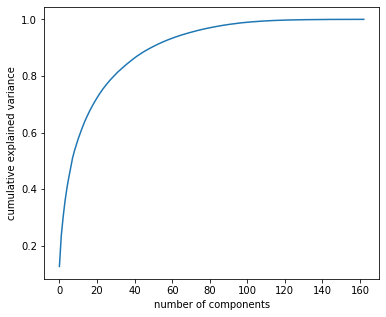

In [59]:
# Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (6,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [60]:
# 90% variance explained by 60 principal components

pca = PCA(n_components=60,random_state=100)

#Scale and transform data to get Principal Components

X_train_reduced = pca.fit_transform(X_train_bal)
X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
print(X_test_reduced.shape)

(38618, 60)
(9001, 60)


In [61]:
# Fetching the 60 PC 

PC_col=[]

for i in range(1,61,1):
    PC_col.append('PC'+str(i))

# Creating a new df__train using the PC

df = pd.DataFrame(X_train_reduced, columns=PC_col)
df2 = pd.DataFrame(data = y_train_bal, columns = ['churn'])
df_train = pd.concat([df,df2], axis=1)
df_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.659250  1.275707 -0.384980 -5.069529  1.188190  0.706241  3.082788   
1  1.513700  1.642187 -3.197312 -0.043850  0.258173  0.398048  1.472461   
2  0.317866 -1.175523 -1.930690 -0.438620  2.137248  0.158715  0.299320   
3 -6.446738  5.814421 -2.858598 -0.259685 -1.381285  0.119250  2.443167   
4  1.863106  1.920579 -3.504329 -0.434869 -0.751608 -0.700155 -0.136452   

        PC8        PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.425001  13.906749  3.700207  2.033220 -5.769981 -1.230233 -0.329413   
1  0.172470   0.866597 -0.996058  0.331952  1.748275  1.973544  0.697425   
2 -0.209155  -0.451681  0.596793  0.042503 -0.268301 -0.914159 -0.099007   
3  5.375075  -1.608695 -1.586727 -1.359070  0.854181 -0.475326  3.706964   
4 -0.581996  -1.040381 -1.515644  1.190567 -2.067834  1.458268  0.121581   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.298616 -0.651296 -1.386802 -3.109802  0.631433 -0.452283  0.076151   
1 -0.838229  0.525514  1.667246  0.920142 -0.150641  0.649515  0.190812   
2 -0.203547 -0.072592  0.810153  1.330734 -0.987845 -0.120833 -0.089439   
3  0.558932  1.722295  0.426085 -2.303252 -0.394984 -0.483163  3.204806   
4 -1.630959  0.867726 -0.955068  0.497386  1.378494 -0.129113  0.133796   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.067130 -0.922341 -0.433688 -2.967114  0.288020  1.279371  0.460150   
1  0.630923  0.248260 -0.110141 -0.962453  0.654183  1.073665 -0.218675   
2 -0.245858  0.490302 -0.258968 -0.221490  0.054033  0.156980  0.540901   
3 -1.985120  1.578454 -0.388510 -2.609137 -3.789420 -1.243828  4.147402   
4  0.642049 -0.484505 -0.867659  1.571467 -0.402412 -1.140195  0.478886   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  0.471287  0.556790 -0.344475 -1.384547 -0.069519 -0.505901  0.048390   
1 -1.032237  1.069186  0.725047 -0.797464 -0.414464 -1.599154  0.764341   
2  0.240489  1.930668  0.319336  0.757211 -0.599929 -0.561432 -0.755198   
3  2.627034  1.794565 -0.706979 -0.324481  2.170906 -0.427743  0.862928   
4 -0.211074  0.820410  0.710727  1.107573 -0.577942  0.146119 -0.583933   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0  1.079561 -0.033246  0.324286  0.234642  0.468302 -0.640942  0.279161   
1 -0.979275 -0.783469  1.936922  1.071739  0.757979 -1.120512  0.424199   
2  0.198975 -0.171977 -0.337655 -0.665678  0.023468  0.865426 -0.001594   
3 -1.470239 -0.400004  1.305038  3.202864 -3.772360 -0.376835 -1.169126   
4  0.890004 -1.706714  0.243531 -0.387964 -0.140497  0.519903  0.122951   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0  0.771692 -0.364261 -0.437021  0.375750 -0.831942 -0.574002  0.084090   
1 -0.439304  0.127310 -1.321887  1.015571  0.157479 -1.021344 -0.457501   
2 -0.056483  0.593830  1.505832 -1.417715  0.933774  1.137984 -0.307571   
3 -0.559779 -1.127532  0.335317 -0.609454  0.619472  0.563870  1.187288   
4  0.127722  0.400960  1.830217 -1.696795  1.060143  0.508503 -0.370681   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0 -0.277665  0.135784  0.542410 -0.643590 -0.176388  0.619531 -0.580066   
1 -0.041458 -0.137677  0.165689 -0.094681 -0.111173  1.132196 -2.064696   
2 -0.209770 -0.229051  1.627062  1.660749  1.902362  0.569198 -0.040942   
3 -0.202740 -0.372438  0.088062  0.463646 -0.544405 -1.165129  2.145901   
4 -0.055598  0.031350  1.152745  1.696861  2.114142  0.091457  0.131161   

       PC57      PC58      PC59      PC60  churn  
0  0.269399 -0.000306 -0.114621 -0.090891      0  
1 -1.430689 -0.671527  0.581940 -0.274415      0  
2 -0.618159 -0.371103  0.134477  0.231180      0  
3  0.639948  1.441183  0.934831  0.567775      0  
4 -0.681690 -0.363559  0.198938 -0.085528      0

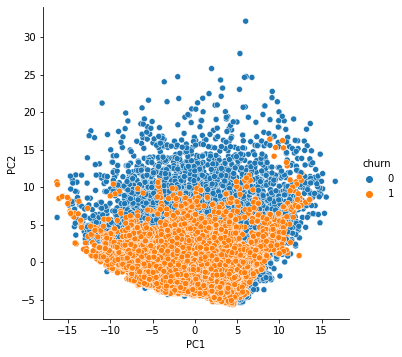

In [62]:
# Visualizing the two most important principal components

sns.pairplot(data=df_train, x_vars=["PC1"], y_vars=["PC2"], hue = "churn", size=5)

In [63]:
# Creating a new df_test using the PC

df_t = pd.DataFrame(X_test_reduced, columns=PC_col)
df2_t = pd.DataFrame(data = y_test, columns = ['churn']).reset_index(drop=True)
df_test = pd.concat([df_t,df2_t],axis=1)
df_test.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.197698 -2.486269 -0.622975 -1.904303  0.143861 -1.142799  0.747333   
1  3.151760 -4.080646 -2.100129  3.282484  1.600087  0.448704 -0.216326   
2 -0.236920  6.392351 -1.777861  0.440126 -1.977707  0.389522 -2.354342   
3 -1.302030 -0.358880 -2.408173 -0.393400 -0.068704 -0.261300  0.471201   
4  1.171355 -0.486229  0.034965  0.097788 -1.988775  0.310970  0.516642   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.958852  0.112217  0.961382  0.246803  0.638561 -0.135244  0.665624   
1  0.165165  0.391623  0.192909  1.316359  0.616173  1.898533  0.308209   
2 -0.562045 -0.785363  2.783003 -1.033335  2.257134  0.338294 -1.170949   
3 -0.754470 -0.881875  1.823655 -0.105902 -0.809562 -0.538753  0.734069   
4  2.185667  0.343718 -2.070543  1.270136 -1.471497  3.563757 -0.844695   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.049959 -0.748974 -0.384945 -0.065371  0.335788 -0.328250  0.220308   
1  1.669579 -0.999061  1.083748 -1.293408 -1.096571  1.158245 -0.547934   
2  1.849686  1.054404 -1.454526  2.064344 -0.426262 -0.839672  0.067617   
3  0.476221 -0.593277 -0.025208  0.784231  1.230205 -0.791371 -0.472780   
4 -0.595843  1.080632  0.955222  1.840564  0.551614 -1.254994  0.722362   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  0.300199  0.090817 -0.092080  0.657250  0.026497 -0.779153 -0.295844   
1  0.009507  0.324676 -0.308943 -1.396309  0.384821  0.647237 -0.362331   
2 -3.107892 -0.364640 -0.568967 -1.431886  0.779118  0.029511  0.922112   
3  0.370295  0.444265 -0.088333 -0.333561 -0.436274 -0.794095 -0.739259   
4  0.033551 -2.072926 -2.944603  0.616564 -0.548294  2.059930  0.213317   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -1.172204 -0.103292 -0.078031 -0.271904 -0.095444 -0.162565  0.076041   
1  0.631405  0.018374 -1.544318  2.746268 -0.116665 -1.613502 -0.494155   
2 -0.182728  0.432446  0.311879 -0.433551 -0.411765  1.236681  0.704940   
3 -0.469715  0.072799 -0.071831 -0.399980  0.283847 -0.088282 -0.356640   
4  0.767946  0.028553 -0.919865 -0.675718  0.839338 -0.311068  0.253592   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -1.131572  0.116685 -0.159022  0.622672  0.073548 -0.064975 -0.209741   
1 -1.364056  0.075894 -0.746858  0.015770  0.374509  1.061185 -1.163184   
2  0.783496 -0.756463 -1.103323 -0.655562 -0.342970 -0.751372  0.477446   
3 -1.173883  0.031616  0.382824  0.430724  0.186860 -0.235598 -0.127013   
4 -0.706772  2.064577  0.778397  0.428020  1.697625 -0.441667 -1.705900   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0  0.234176 -0.189617 -0.104277 -0.009424  0.956530  0.268553  0.027740   
1 -0.426066  0.424711 -0.482597 -0.354610 -0.149011 -0.675007 -0.846550   
2 -0.087554 -1.171560 -0.261235 -0.201128 -0.547641  0.544710 -1.331772   
3  0.175741  0.428271 -0.066149  0.113627 -0.258472  0.074730  0.132580   
4  0.331561  0.913503 -1.127703 -0.552205 -0.720417 -0.528301  0.388152   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  0.206024  0.110267 -0.047548 -0.228819 -0.176247  0.517721  0.287622   
1 -0.028976  0.859717  0.513263  0.298403  0.162590  0.072223 -0.121055   
2  0.098789  0.061704  0.493442 -0.395498 -0.363143 -0.141948  0.558345   
3 -0.132907 -0.219179 -0.238303 -0.275200  0.460763 -0.141434 -0.181286   
4 -1.277002  1.199016  0.504433 -0.212083 -0.099006  0.976340 -0.846880   

       PC57      PC58      PC59      PC60  churn  
0  0.106684 -0.358777 -0.055041  0.595328      1  
1 -0.444856 -0.366760  0.392482  0.553919      1  
2  0.530373  0.427926 -0.182921 -0.272850      0  
3  0.256493  0.475602  0.554010 -0.064375      0  
4 -1.373277  0.163041 -0.642142 -0.991135      1

### Step 4.1.2: Model 1: Logistic Regression with PCA

In [64]:
# Creating X and y for train and test respectively using PCA datasets

y_train_pca = df_train['churn']
X_train_pca = df_train.drop(columns = ['churn'],axis = 1)
y_test_pca = df_test['churn']
X_test_pca = df_test.drop(columns = ['churn'],axis = 1)

In [65]:
# Fitting the Logistic regression model
regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train_pca, y_train_pca)

# Make predictions using the testing set
y_pred = regr.predict(X_test_pca)

In [66]:
# Predicting the y train

y_test_pred_f = pd.DataFrame({'Churn':y_test_pca, 'Churn_Pred':y_pred})
y_test_pred_f.head()

Churn  Churn_Pred
0      1           1
1      1           0
2      0           0
3      0           0
4      1           1

In [67]:
# Creating the Confusion Matrix

confusion = metrics.confusion_matrix(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred)
print(confusion)

# Let's check the overall accuracy.

print(metrics.accuracy_score(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred))

[[6907 1344]
 [ 145  605]]
0.8345739362293079


In [68]:
# Calculating Recall metric

print(recall_score(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred))

0.8066666666666666


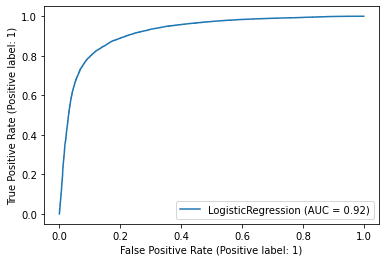

In [69]:
# Plotting ROC Curve

plot_roc_curve(regr, X_train_pca, y_train_pca, drop_intermediate=False)
plt.show()

In [70]:
regr.coef_

array([[-0.09358137, -0.51467307,  0.31405559, -0.36133734, -0.31712226,
         0.24983662, -0.05829665,  0.18831707,  0.06293244,  0.24161468,
         0.21567543,  0.07621061, -0.04906994, -0.44641355, -0.10180192,
        -0.09047155,  0.15214932, -0.00246006, -0.09645572, -0.19634088,
        -0.096364  , -0.02632091, -0.14039846,  0.22781603,  0.04739831,
         0.05774772,  0.17619903, -0.59476245,  0.02710804, -0.15477122,
         0.23454066, -0.13650887, -0.04715032, -0.18063657,  0.10104904,
        -0.13439225,  0.09442191, -0.12092812, -0.10605681, -0.00653747,
         0.20075466, -0.11426022,  0.05772101,  0.16692068, -0.2193839 ,
        -0.40073171, -0.34370069,  0.31945358,  0.15849373,  0.1757923 ,
         0.05483759, -0.0573127 ,  0.03852859,  0.10923416,  0.0856484 ,
        -0.17025964,  0.28484914,  0.12857542, -0.4750981 ,  0.03874487]])

#### High accuracy model Logistic Regression with PCA gives AUC of 0.92 and Recall of 80.7%. Let's try another model!

### Step 4.1.3: Model 2: Random Forest

In [71]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier()

# Fitting on Train

rfc.fit(X_train_pca,y_train_pca)

# Making predictions

predictions = rfc.predict(X_test_pca)

# Let's check the report of our default model

print(classification_report(y_test_pca,predictions))

# Printing confusion matrix and accuracy

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8251
           1       0.49      0.50      0.50       750

    accuracy                           0.91      9001
   macro avg       0.72      0.73      0.72      9001
weighted avg       0.92      0.91      0.92      9001

[[7856  395]
 [ 373  377]]
0.9146761470947673


In [72]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [150, 200],
    'min_samples_split': range(250, 350, 50),
    'n_estimators': [250,300], 
    'max_features': [7, 8]
}

In [73]:
# Create a based model
rf = RandomForestClassifier()

In [74]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose =1)

In [75]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_pca)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [7, 8],
                         'min_samples_leaf': [150, 200],
                         'min_samples_split': range(250, 350, 50),
                         'n_estimators': [250, 300]},
             verbose=1)

In [76]:
# Printing the optimal accuracy score and hyperparameters

print(grid_search.best_score_,grid_search.best_params_)

0.8481536776442219 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 300}


In [77]:
# Hyperparameters are tuned on the above based parameters. 
# Out of the best received parameters, we re-run the model a couple of times and came up with the below parameters 

# Creating final model with best hyperparameters 

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=150, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=250)

# Fitting it on train set
rfc.fit(X_train_pca,y_train_pca)

RandomForestClassifier(max_depth=15, max_features=8, min_samples_leaf=150,
                       min_samples_split=250, n_estimators=250)

In [78]:
# Printing the time
mean_fit_time= grid_search.cv_results_['mean_fit_time']
mean_score_time= grid_search.cv_results_['mean_score_time']
n_splits  = grid_search.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(grid_search.cv_results_).shape[0] #Iterations per split

print(np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)

6040.303347110748


In [79]:
# Predicting the Test
predictions = rfc.predict(X_test_pca)

In [80]:
# Calculating the evaluation measures

print(classification_report(y_test_pca,predictions))

print(confusion_matrix(y_test_pca,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8251
           1       0.37      0.72      0.49       750

    accuracy                           0.88      9001
   macro avg       0.67      0.81      0.71      9001
weighted avg       0.92      0.88      0.89      9001

[[7338  913]
 [ 207  543]]


In [81]:
print(recall_score(y_test_pca, predictions))

0.724


In [82]:
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_pca, predictions))

AUC Score (Train): 0.806673


#### High Accuracy model Random Forest gives AUC 0.81 of and Recall of 72.7%. Let's try another model!

### Step 4.1.4: Model 3: Gradient Boosting

In [83]:
# Parameter grid
param_grid = {"learning_rate": [0.1, 0.5, 0.8],
              "subsample": [0.1, 0.5, 0.8]}

In [84]:
# Gradient Boosting with the tree as base estimator

GBC = GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [85]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'recall', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train_pca, y_train_pca)

cv_results = pd.DataFrame(grid_search_GBC.cv_results_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [86]:
# Printing the Grid Search CV results

cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.259817      0.428503         0.068238        0.007009   
1      61.424109      1.080973         0.074322        0.014444   
2     102.080948      1.441074         0.070578        0.011446   
3      11.838038      0.172137         0.050069        0.004532   
4      62.578727      0.385545         0.052855        0.004539   
5     101.962199      0.584119         0.060173        0.003291   
6      11.394638      0.157527         0.061171        0.004484   
7      62.605447      0.275195         0.044548        0.002049   
8     102.235902      1.158430         0.060187        0.003855   

  param_learning_rate param_subsample  \
0                 0.1             0.1   
1                 0.1             0.5   
2                 0.1             0.8   
3                 0.5             0.1   
4                 0.5             0.5   
5                 0.5             0.8   
6                 0.8             0.1   
7                 0.8             0.5   
8                 0.8             0.8   

                                     params  split0_test_score  \
0  {'learning_rate': 0.1, 'subsample': 0.1}           0.890771   
1  {'learning_rate': 0.1, 'subsample': 0.5}           0.922623   
2  {'learning_rate': 0.1, 'subsample': 0.8}           0.925109   
3  {'learning_rate': 0.5, 'subsample': 0.1}           0.735705   
4  {'learning_rate': 0.5, 'subsample': 0.5}           0.918894   
5  {'learning_rate': 0.5, 'subsample': 0.8}           0.948726   
6  {'learning_rate': 0.8, 'subsample': 0.1}           0.435830   
7  {'learning_rate': 0.8, 'subsample': 0.5}           0.892635   
8  {'learning_rate': 0.8, 'subsample': 0.8}           0.931168   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.915333           0.918117         0.908074        0.012288   
1           0.951064           0.944220         0.939302        0.012121   
2           0.949977           0.949037         0.941374        0.011508   
3           0.757651           0.818055         0.770470        0.034820   
4           0.943607           0.949347         0.937283        0.013213   
5           0.962094           0.960379         0.957066        0.005939   
6           0.463725           0.576290         0.491948        0.060716   
7           0.923412           0.918428         0.911491        0.013488   
8           0.958210           0.956339         0.948573        0.012330   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.941894            0.929382   
1                4            0.974365            0.973819   
2                3            0.976695            0.976616   
3                8            0.770683            0.759167   
4                5            0.990057            0.979801   
5                1            0.999922            0.994562   
6                9            0.443098            0.465040   
7                6            0.957042            0.970090   
8                2            0.995805            0.999767   

   split2_train_score  mean_train_score  std_train_score  
0            0.933504          0.934927         0.005206  
1            0.970248          0.972811         0.001826  
2            0.977239          0.976850         0.000277  
3            0.828867          0.786239         0.030507  
4            0.996194          0.988684         0.006762  
5            0.999612          0.998032         0.002457  
6            0.579974          0.496037         0.060024  
7            0.961470          0.962867         0.005418  
8            1.000000          0.998524         0.001925

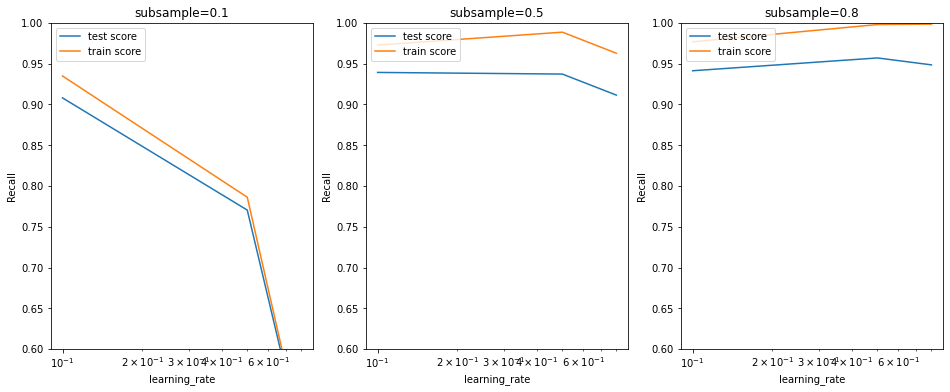

In [87]:
# Plotting the curve

plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):

    # Subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('Recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [88]:
# Hyperparameters are tuned on the above based parameters. 
# Out of the best received parameters, we re-run the model a couple of times and came up with the below parameters

# Tuning the GradientBoostingClassifier with best parameters

gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,max_features = 8, subsample = 0.8, max_depth=5, min_samples_split=280,  random_state=10)

In [89]:
# Fitting the Gradient Boosting Model

gbm_final.fit(X_train_pca, y_train_pca)

GradientBoostingClassifier(max_depth=5, max_features=8, min_samples_split=280,
                           n_estimators=200, random_state=10, subsample=0.8)

In [90]:
# Predictions on Test data

predictions_gbm = gbm_final.predict(X_test_pca)

print(confusion_matrix(y_test_pca,predictions_gbm))

print ("Accuracy : %.4g" % metrics.roc_auc_score(y_test_pca, predictions_gbm))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_pca, predictions_gbm))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_pca, predictions_gbm))

[[7439  812]
 [ 213  537]]
Accuracy : 0.8088
Recall/Sensitivity : 0.716
AUC Score (Train): 0.808794


#### High Accuracy model Gradient Boosting gives AUC 0.81 of and Recall of 71.6%.

#### Observation: In the accuracy models, model with Logistic Regression with PCA gives the best results with an AUC of and Recall of . Since we are aiming at identifying the churn customers hence we are using Recall value as Model Evaluation.

### Step 4.2: Interpretability model

### Step 4.2.1: Logistic Regression without PCA

### Step 4.2.1.1 : RFE

In [91]:
# Applying RFE on training set to find out important features

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=25)
rfe = rfe.fit(X_train_bal, y_train_bal)

In [92]:
# Checking the list of the columns selected

list(zip(X_train_bal.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 101),
 ('arpu_7', False, 2),
 ('arpu_8', False, 51),
 ('onnet_mou_6', False, 35),
 ('onnet_mou_7', False, 17),
 ('onnet_mou_8', False, 28),
 ('offnet_mou_6', False, 34),
 ('offnet_mou_7', False, 45),
 ('offnet_mou_8', False, 27),
 ('roam_ic_mou_6', False, 122),
 ('roam_ic_mou_7', False, 128),
 ('roam_ic_mou_8', False, 123),
 ('roam_og_mou_6', False, 87),
 ('roam_og_mou_7', False, 116),
 ('roam_og_mou_8', False, 30),
 ('loc_og_t2t_mou_6', False, 36),
 ('loc_og_t2t_mou_7', False, 22),
 ('loc_og_t2t_mou_8', False, 65),
 ('loc_og_t2m_mou_6', False, 85),
 ('loc_og_t2m_mou_7', False, 25),
 ('loc_og_t2m_mou_8', False, 64),
 ('loc_og_t2f_mou_6', False, 132),
 ('loc_og_t2f_mou_7', False, 99),
 ('loc_og_t2f_mou_8', False, 100),
 ('loc_og_t2c_mou_6', False, 81),
 ('loc_og_t2c_mou_7', False, 102),
 ('loc_og_t2c_mou_8', False, 119),
 ('loc_og_mou_6', False, 91),
 ('loc_og_mou_7', False, 24),
 ('loc_og_mou_8', False, 29),
 ('std_og_t2t_mou_6', False, 32),
 ('std_og_t2t_mou_7', Fal

In [93]:
# Filtering the X train columns selected by the RFE

col = X_train_bal.columns[rfe.support_]

In [94]:
for i in X_train_bal.columns:
    print(i)

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


### Step 4.2.2.2 :Fitting Logistic Regression

In [95]:
# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm1 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38592
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11283.
Date:                Sat, 14 Jan 2023   Deviance:                       22566.
Time:                        18:15:36   Pearson chi2:                 9.33e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5515
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.3263      0.064     36.459      0.000       2.201       2.451
std_og_mou_8                       1.3102      0.083     15.782      0.000       1.147       1.473
total_og_mou_8                    -1.9288      0.095    -20.370      0.000      -2.114      -1.743
loc_ic_t2t_mou_6                   0.6216      0.066      9.419      0.000       0.492       0.751
loc_ic_t2m_mou_6                   1.2228      0.114     10.749      0.000       1.000       1.446
loc_ic_t2m_mou_8                  -0.6301      0.073     -8.677      0.000      -0.772      -0.488
loc_ic_mou_6                      -1.0457      0.150     -6.992      0.000      -1.339      -0.753
total_ic_mou_8                    -0.8895      0.063    -14.039      0.000      -1.014      -0.765
spl_ic_mou_8                      -0.6627      0.036    -18.557      0.000      -0.733      -0.593
total_rech_num_8                  -0.4104      0.027    -15.423      0.000      -0.463      -0.358
count_rech_2g_7                   -1.4299      0.148     -9.630      0.000      -1.721      -1.139
sachet_2g_7                        1.5660      0.145     10.795      0.000       1.282       1.850
night_pck_user_6_0.0              -1.1751      0.054    -21.679      0.000      -1.281      -1.069
night_pck_user_6_1.0              -2.1165      0.261     -8.121      0.000      -2.627      -1.606
night_pck_user_7_1.0              -1.0347      0.328     -3.158      0.002      -1.677      -0.393
night_pck_user_8_0.0              -0.4830      0.190     -2.542      0.011      -0.855      -0.111
night_pck_user_8_1.0              -0.5027      0.419     -1.200      0.230      -1.324       0.318
fb_user_7_0.0                     -0.8961      0.128     -7.002      0.000      -1.147      -0.645
fb_user_7_1.0                     -0.8741      0.062    -14.015      0.000      -0.996      -0.752
fb_user_8_0.0                     -0.8822      0.222     -3.971      0.000      -1.318      -0.447
fb_user_8_1.0                     -2.0712      0.191    -10.872      0.000      -2.445      -1.698
aon_buckets_2001-4321             -3.0863      0.068    -45.199      0.000      -3.220      -2.952
aon_buckets_451-900               -1.8996      0.042    -45.357      0.000      -1.982      -1.818
aon_buckets_901-2000              -2.4864      0.050    -49.360      0.000      -2.585      -2.388
UserType_Call Service Only        -1.9127      0.059    -32.263      0.000      -2.029      -1.797
UserType_Internet Service Only     0.8463      0.123      6.895      0.000       0.606       1.087
==================================================================================================
"""

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

def VIF(x):
    vif = pd.DataFrame()
    vif['Features'] = X_train_bal[x].columns
    vif['VIF'] = [variance_inflation_factor(X_train_bal[x].values, i) for i in range(X_train_bal[x].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

VIF(col)

Features    VIF
14            night_pck_user_8_0.0  55.89
19                   fb_user_8_1.0  51.50
9                  count_rech_2g_7  46.39
10                     sachet_2g_7  43.75
5                     loc_ic_mou_6  26.33
3                 loc_ic_t2m_mou_6  15.92
1                   total_og_mou_8   7.30
18                   fb_user_8_0.0   6.69
0                     std_og_mou_8   5.94
4                 loc_ic_t2m_mou_8   5.55
2                 loc_ic_t2t_mou_6   5.46
6                   total_ic_mou_8   5.02
17                   fb_user_7_1.0   4.03
11            night_pck_user_6_0.0   3.17
15            night_pck_user_8_1.0   2.71
8                 total_rech_num_8   1.82
23      UserType_Call Service Only   1.76
13            night_pck_user_7_1.0   1.72
21             aon_buckets_451-900   1.45
20           aon_buckets_2001-4321   1.43
22            aon_buckets_901-2000   1.40
12            night_pck_user_6_1.0   1.39
16                   fb_user_7_0.0   1.30
24  UserType_Internet Service Only   1.07
7                     spl_ic_mou_8   1.06

In [97]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('night_pck_user_8_0.0', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm2 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38593
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11286.
Date:                Sat, 14 Jan 2023   Deviance:                       22572.
Time:                        18:15:37   Pearson chi2:                 9.28e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5515
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.3177      0.064     36.377      0.000       2.193       2.443
std_og_mou_8                       1.3130      0.083     15.811      0.000       1.150       1.476
total_og_mou_8                    -1.9324      0.095    -20.402      0.000      -2.118      -1.747
loc_ic_t2t_mou_6                   0.6197      0.066      9.399      0.000       0.490       0.749
loc_ic_t2m_mou_6                   1.2196      0.114     10.731      0.000       0.997       1.442
loc_ic_t2m_mou_8                  -0.6288      0.073     -8.663      0.000      -0.771      -0.487
loc_ic_mou_6                      -1.0415      0.149     -6.971      0.000      -1.334      -0.749
total_ic_mou_8                    -0.8894      0.063    -14.041      0.000      -1.014      -0.765
spl_ic_mou_8                      -0.6617      0.036    -18.545      0.000      -0.732      -0.592
total_rech_num_8                  -0.4106      0.027    -15.429      0.000      -0.463      -0.358
count_rech_2g_7                   -1.4273      0.148     -9.626      0.000      -1.718      -1.137
sachet_2g_7                        1.5581      0.145     10.759      0.000       1.274       1.842
night_pck_user_6_0.0              -1.1829      0.054    -21.858      0.000      -1.289      -1.077
night_pck_user_6_1.0              -2.1158      0.260     -8.130      0.000      -2.626      -1.606
night_pck_user_7_1.0              -1.0320      0.327     -3.152      0.002      -1.674      -0.390
night_pck_user_8_1.0              -0.0256      0.374     -0.068      0.946      -0.760       0.708
fb_user_7_0.0                     -0.8862      0.128     -6.931      0.000      -1.137      -0.636
fb_user_7_1.0                     -0.8675      0.062    -13.919      0.000      -0.990      -0.745
fb_user_8_0.0                     -1.3592      0.119    -11.389      0.000      -1.593      -1.125
fb_user_8_1.0                     -2.5384      0.052    -48.354      0.000      -2.641      -2.435
aon_buckets_2001-4321             -3.0838      0.068    -45.196      0.000      -3.218      -2.950
aon_buckets_451-900               -1.8968      0.042    -45.326      0.000      -1.979      -1.815
aon_buckets_901-2000              -2.4871      0.050    -49.358      0.000      -2.586      -2.388
UserType_Call Service Only        -1.9073      0.059    -32.191      0.000      -2.023      -1.791
UserType_Internet Service Only     0.8362      0.123      6.815      0.000       0.596       1.077
==================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

Features    VIF
9                  count_rech_2g_7  46.38
10                     sachet_2g_7  43.73
5                     loc_ic_mou_6  26.33
3                 loc_ic_t2m_mou_6  15.92
1                   total_og_mou_8   7.30
0                     std_og_mou_8   5.94
4                 loc_ic_t2m_mou_8   5.55
2                 loc_ic_t2t_mou_6   5.46
6                   total_ic_mou_8   5.02
16                   fb_user_7_1.0   4.03
11            night_pck_user_6_0.0   3.16
18                   fb_user_8_1.0   2.88
8                 total_rech_num_8   1.82
22      UserType_Call Service Only   1.76
13            night_pck_user_7_1.0   1.72
14            night_pck_user_8_1.0   1.62
20             aon_buckets_451-900   1.45
19           aon_buckets_2001-4321   1.43
21            aon_buckets_901-2000   1.40
12            night_pck_user_6_1.0   1.39
15                   fb_user_7_0.0   1.30
17                   fb_user_8_0.0   1.26
23  UserType_Internet Service Only   1.07
7                     spl_ic_mou_8   1.06

In [99]:
# Dropping the high P-value column and running another Logistic Regression Model

col = col.drop('night_pck_user_8_1.0', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm3 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38594
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11286.
Date:                Sat, 14 Jan 2023   Deviance:                       22572.
Time:                        18:15:38   Pearson chi2:                 9.25e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5515
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.3176      0.064     36.392      0.000       2.193       2.442
std_og_mou_8                       1.3130      0.083     15.811      0.000       1.150       1.476
total_og_mou_8                    -1.9324      0.095    -20.402      0.000      -2.118      -1.747
loc_ic_t2t_mou_6                   0.6197      0.066      9.400      0.000       0.491       0.749
loc_ic_t2m_mou_6                   1.2196      0.114     10.731      0.000       0.997       1.442
loc_ic_t2m_mou_8                  -0.6288      0.073     -8.662      0.000      -0.771      -0.487
loc_ic_mou_6                      -1.0415      0.149     -6.971      0.000      -1.334      -0.749
total_ic_mou_8                    -0.8894      0.063    -14.041      0.000      -1.014      -0.765
spl_ic_mou_8                      -0.6617      0.036    -18.545      0.000      -0.732      -0.592
total_rech_num_8                  -0.4107      0.027    -15.440      0.000      -0.463      -0.359
count_rech_2g_7                   -1.4273      0.148     -9.626      0.000      -1.718      -1.137
sachet_2g_7                        1.5581      0.145     10.759      0.000       1.274       1.842
night_pck_user_6_0.0              -1.1828      0.054    -21.864      0.000      -1.289      -1.077
night_pck_user_6_1.0              -2.1166      0.260     -8.144      0.000      -2.626      -1.607
night_pck_user_7_1.0              -1.0384      0.314     -3.312      0.001      -1.653      -0.424
fb_user_7_0.0                     -0.8862      0.128     -6.932      0.000      -1.137      -0.636
fb_user_7_1.0                     -0.8674      0.062    -13.924      0.000      -0.989      -0.745
fb_user_8_0.0                     -1.3593      0.119    -11.393      0.000      -1.593      -1.125
fb_user_8_1.0                     -2.5386      0.052    -48.483      0.000      -2.641      -2.436
aon_buckets_2001-4321             -3.0838      0.068    -45.196      0.000      -3.218      -2.950
aon_buckets_451-900               -1.8968      0.042    -45.326      0.000      -1.979      -1.815
aon_buckets_901-2000              -2.4871      0.050    -49.358      0.000      -2.586      -2.388
UserType_Call Service Only        -1.9072      0.059    -32.205      0.000      -2.023      -1.791
UserType_Internet Service Only     0.8363      0.123      6.816      0.000       0.596       1.077
==================================================================================================
"""

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

Features    VIF
9                  count_rech_2g_7  46.37
10                     sachet_2g_7  43.72
5                     loc_ic_mou_6  26.33
3                 loc_ic_t2m_mou_6  15.92
1                   total_og_mou_8   7.30
0                     std_og_mou_8   5.94
4                 loc_ic_t2m_mou_8   5.55
2                 loc_ic_t2t_mou_6   5.46
6                   total_ic_mou_8   5.02
15                   fb_user_7_1.0   4.03
11            night_pck_user_6_0.0   3.16
17                   fb_user_8_1.0   2.87
8                 total_rech_num_8   1.81
21      UserType_Call Service Only   1.76
19             aon_buckets_451-900   1.45
18           aon_buckets_2001-4321   1.43
20            aon_buckets_901-2000   1.40
12            night_pck_user_6_1.0   1.34
13            night_pck_user_7_1.0   1.33
14                   fb_user_7_0.0   1.30
16                   fb_user_8_0.0   1.26
22  UserType_Internet Service Only   1.07
7                     spl_ic_mou_8   1.06

In [101]:
# Dropping the high VIF value column and running another Logistic Regression Model

col = col.drop('count_rech_2g_7', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm4 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38595
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11335.
Date:                Sat, 14 Jan 2023   Deviance:                       22670.
Time:                        18:15:40   Pearson chi2:                 8.01e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5503
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.4111      0.063     38.202      0.000       2.287       2.535
std_og_mou_8                       1.3277      0.083     15.923      0.000       1.164       1.491
total_og_mou_8                    -1.9484      0.095    -20.480      0.000      -2.135      -1.762
loc_ic_t2t_mou_6                   0.6268      0.066      9.519      0.000       0.498       0.756
loc_ic_t2m_mou_6                   1.2284      0.113     10.859      0.000       1.007       1.450
loc_ic_t2m_mou_8                  -0.6375      0.073     -8.765      0.000      -0.780      -0.495
loc_ic_mou_6                      -1.0582      0.149     -7.112      0.000      -1.350      -0.767
total_ic_mou_8                    -0.8895      0.063    -14.040      0.000      -1.014      -0.765
spl_ic_mou_8                      -0.6623      0.036    -18.600      0.000      -0.732      -0.593
total_rech_num_8                  -0.4085      0.027    -15.342      0.000      -0.461      -0.356
sachet_2g_7                        0.1848      0.022      8.383      0.000       0.142       0.228
night_pck_user_6_0.0              -1.1733      0.054    -21.812      0.000      -1.279      -1.068
night_pck_user_6_1.0              -2.0842      0.260     -8.026      0.000      -2.593      -1.575
night_pck_user_7_1.0              -1.0049      0.314     -3.203      0.001      -1.620      -0.390
fb_user_7_0.0                     -0.9864      0.127     -7.746      0.000      -1.236      -0.737
fb_user_7_1.0                     -1.0544      0.059    -17.774      0.000      -1.171      -0.938
fb_user_8_0.0                     -1.3329      0.119    -11.173      0.000      -1.567      -1.099
fb_user_8_1.0                     -2.5227      0.052    -48.580      0.000      -2.625      -2.421
aon_buckets_2001-4321             -3.0821      0.068    -45.287      0.000      -3.215      -2.949
aon_buckets_451-900               -1.8950      0.042    -45.430      0.000      -1.977      -1.813
aon_buckets_901-2000              -2.4918      0.050    -49.542      0.000      -2.590      -2.393
UserType_Call Service Only        -1.8773      0.059    -31.779      0.000      -1.993      -1.762
UserType_Internet Service Only     0.9751      0.122      7.994      0.000       0.736       1.214
==================================================================================================
"""

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

Features    VIF
5                     loc_ic_mou_6  26.33
3                 loc_ic_t2m_mou_6  15.92
1                   total_og_mou_8   7.30
0                     std_og_mou_8   5.94
4                 loc_ic_t2m_mou_8   5.54
2                 loc_ic_t2t_mou_6   5.45
6                   total_ic_mou_8   5.02
14                   fb_user_7_1.0   3.82
10            night_pck_user_6_0.0   3.12
16                   fb_user_8_1.0   2.87
8                 total_rech_num_8   1.81
20      UserType_Call Service Only   1.64
18             aon_buckets_451-900   1.44
17           aon_buckets_2001-4321   1.43
19            aon_buckets_901-2000   1.40
9                      sachet_2g_7   1.37
11            night_pck_user_6_1.0   1.34
12            night_pck_user_7_1.0   1.33
13                   fb_user_7_0.0   1.30
15                   fb_user_8_0.0   1.26
7                     spl_ic_mou_8   1.06
21  UserType_Internet Service Only   1.06

In [103]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('loc_ic_mou_6', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm5 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38596
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11361.
Date:                Sat, 14 Jan 2023   Deviance:                       22723.
Time:                        18:15:41   Pearson chi2:                 8.03e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5497
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.4305      0.063     38.646      0.000       2.307       2.554
std_og_mou_8                       1.2999      0.083     15.670      0.000       1.137       1.462
total_og_mou_8                    -1.9151      0.095    -20.247      0.000      -2.101      -1.730
loc_ic_t2t_mou_6                   0.2061      0.029      7.146      0.000       0.150       0.263
loc_ic_t2m_mou_6                   0.4669      0.034     13.550      0.000       0.399       0.534
loc_ic_t2m_mou_8                  -0.6119      0.072     -8.454      0.000      -0.754      -0.470
total_ic_mou_8                    -0.9351      0.063    -14.960      0.000      -1.058      -0.813
spl_ic_mou_8                      -0.6594      0.036    -18.557      0.000      -0.729      -0.590
total_rech_num_8                  -0.4017      0.027    -15.130      0.000      -0.454      -0.350
sachet_2g_7                        0.1851      0.022      8.413      0.000       0.142       0.228
night_pck_user_6_0.0              -1.1831      0.054    -22.044      0.000      -1.288      -1.078
night_pck_user_6_1.0              -2.0857      0.258     -8.084      0.000      -2.591      -1.580
night_pck_user_7_1.0              -0.9900      0.312     -3.172      0.002      -1.602      -0.378
fb_user_7_0.0                     -0.9637      0.127     -7.588      0.000      -1.213      -0.715
fb_user_7_1.0                     -1.0425      0.059    -17.614      0.000      -1.158      -0.926
fb_user_8_0.0                     -1.3265      0.119    -11.137      0.000      -1.560      -1.093
fb_user_8_1.0                     -2.5221      0.052    -48.649      0.000      -2.624      -2.420
aon_buckets_2001-4321             -3.0952      0.068    -45.578      0.000      -3.228      -2.962
aon_buckets_451-900               -1.8938      0.042    -45.451      0.000      -1.975      -1.812
aon_buckets_901-2000              -2.4955      0.050    -49.662      0.000      -2.594      -2.397
UserType_Call Service Only        -1.8634      0.059    -31.638      0.000      -1.979      -1.748
UserType_Internet Service Only     0.9792      0.122      8.030      0.000       0.740       1.218
==================================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

Features   VIF
1                   total_og_mou_8  7.29
0                     std_og_mou_8  5.94
4                 loc_ic_t2m_mou_8  5.46
5                   total_ic_mou_8  4.76
13                   fb_user_7_1.0  3.82
9             night_pck_user_6_0.0  3.12
15                   fb_user_8_1.0  2.87
3                 loc_ic_t2m_mou_6  2.06
7                 total_rech_num_8  1.81
19      UserType_Call Service Only  1.63
2                 loc_ic_t2t_mou_6  1.49
17             aon_buckets_451-900  1.44
16           aon_buckets_2001-4321  1.43
18            aon_buckets_901-2000  1.40
8                      sachet_2g_7  1.37
10            night_pck_user_6_1.0  1.34
11            night_pck_user_7_1.0  1.33
12                   fb_user_7_0.0  1.30
14                   fb_user_8_0.0  1.26
6                     spl_ic_mou_8  1.06
20  UserType_Internet Service Only  1.06

In [105]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('total_og_mou_8', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm6 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11630.
Date:                Sat, 14 Jan 2023   Deviance:                       23260.
Time:                        18:15:41   Pearson chi2:                 1.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5434
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.5344      0.062     40.685      0.000       2.412       2.656
std_og_mou_8                      -0.2968      0.023    -12.995      0.000      -0.342      -0.252
loc_ic_t2t_mou_6                   0.1171      0.028      4.136      0.000       0.062       0.173
loc_ic_t2m_mou_6                   0.5166      0.035     14.934      0.000       0.449       0.584
loc_ic_t2m_mou_8                  -1.0674      0.073    -14.611      0.000      -1.211      -0.924
total_ic_mou_8                    -1.1217      0.065    -17.379      0.000      -1.248      -0.995
spl_ic_mou_8                      -0.6476      0.035    -18.256      0.000      -0.717      -0.578
total_rech_num_8                  -0.4852      0.026    -18.699      0.000      -0.536      -0.434
sachet_2g_7                        0.2254      0.022     10.222      0.000       0.182       0.269
night_pck_user_6_0.0              -1.1622      0.053    -21.899      0.000      -1.266      -1.058
night_pck_user_6_1.0              -2.0821      0.257     -8.116      0.000      -2.585      -1.579
night_pck_user_7_1.0              -0.9728      0.309     -3.148      0.002      -1.579      -0.367
fb_user_7_0.0                     -1.0506      0.124     -8.482      0.000      -1.293      -0.808
fb_user_7_1.0                     -1.0475      0.058    -17.908      0.000      -1.162      -0.933
fb_user_8_0.0                     -1.4594      0.117    -12.514      0.000      -1.688      -1.231
fb_user_8_1.0                     -2.4936      0.052    -48.366      0.000      -2.595      -2.393
aon_buckets_2001-4321             -3.1945      0.067    -47.977      0.000      -3.325      -3.064
aon_buckets_451-900               -1.8804      0.041    -45.704      0.000      -1.961      -1.800
aon_buckets_901-2000              -2.5068      0.049    -50.667      0.000      -2.604      -2.410
UserType_Call Service Only        -1.8897      0.058    -32.605      0.000      -2.003      -1.776
UserType_Internet Service Only     1.0001      0.122      8.212      0.000       0.761       1.239
==================================================================================================
"""

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

Features   VIF
3                 loc_ic_t2m_mou_8  5.22
4                   total_ic_mou_8  4.71
12                   fb_user_7_1.0  3.81
8             night_pck_user_6_0.0  3.12
14                   fb_user_8_1.0  2.86
2                 loc_ic_t2m_mou_6  2.06
6                 total_rech_num_8  1.74
18      UserType_Call Service Only  1.63
0                     std_og_mou_8  1.52
1                 loc_ic_t2t_mou_6  1.47
16             aon_buckets_451-900  1.44
15           aon_buckets_2001-4321  1.41
17            aon_buckets_901-2000  1.40
7                      sachet_2g_7  1.36
9             night_pck_user_6_1.0  1.34
10            night_pck_user_7_1.0  1.33
11                   fb_user_7_0.0  1.29
13                   fb_user_8_0.0  1.26
5                     spl_ic_mou_8  1.06
19  UserType_Internet Service Only  1.06

In [107]:
# Dropping the high VIF value column and running another Logistic Regression Model

col = col.drop('loc_ic_t2m_mou_8', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm7 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38598
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11735.
Date:                Sat, 14 Jan 2023   Deviance:                       23470.
Time:                        18:15:42   Pearson chi2:                 1.50e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5409
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.6303      0.062     42.656      0.000       2.509       2.751
std_og_mou_8                      -0.2761      0.023    -12.148      0.000      -0.321      -0.232
loc_ic_t2t_mou_6                   0.2100      0.028      7.527      0.000       0.155       0.265
loc_ic_t2m_mou_6                   0.2941      0.030      9.930      0.000       0.236       0.352
total_ic_mou_8                    -1.9095      0.047    -40.916      0.000      -2.001      -1.818
spl_ic_mou_8                      -0.6440      0.035    -18.229      0.000      -0.713      -0.575
total_rech_num_8                  -0.5177      0.026    -20.002      0.000      -0.568      -0.467
sachet_2g_7                        0.2301      0.022     10.483      0.000       0.187       0.273
night_pck_user_6_0.0              -1.1751      0.053    -22.199      0.000      -1.279      -1.071
night_pck_user_6_1.0              -2.1000      0.256     -8.201      0.000      -2.602      -1.598
night_pck_user_7_1.0              -0.9426      0.308     -3.061      0.002      -1.546      -0.339
fb_user_7_0.0                     -1.0457      0.123     -8.489      0.000      -1.287      -0.804
fb_user_7_1.0                     -1.0985      0.058    -18.890      0.000      -1.212      -0.984
fb_user_8_0.0                     -1.4850      0.116    -12.817      0.000      -1.712      -1.258
fb_user_8_1.0                     -2.4930      0.051    -48.531      0.000      -2.594      -2.392
aon_buckets_2001-4321             -3.2271      0.066    -48.875      0.000      -3.356      -3.098
aon_buckets_451-900               -1.8927      0.041    -46.172      0.000      -1.973      -1.812
aon_buckets_901-2000              -2.5235      0.049    -51.358      0.000      -2.620      -2.427
UserType_Call Service Only        -1.9144      0.058    -33.126      0.000      -2.028      -1.801
UserType_Internet Service Only     0.9940      0.122      8.149      0.000       0.755       1.233
==================================================================================================
"""

In [108]:
VIF(col)

Features   VIF
11                   fb_user_7_1.0  3.81
7             night_pck_user_6_0.0  3.11
13                   fb_user_8_1.0  2.86
3                   total_ic_mou_8  1.95
5                 total_rech_num_8  1.71
17      UserType_Call Service Only  1.62
2                 loc_ic_t2m_mou_6  1.59
0                     std_og_mou_8  1.50
15             aon_buckets_451-900  1.44
14           aon_buckets_2001-4321  1.40
16            aon_buckets_901-2000  1.40
6                      sachet_2g_7  1.36
8             night_pck_user_6_1.0  1.34
1                 loc_ic_t2t_mou_6  1.34
9             night_pck_user_7_1.0  1.33
10                   fb_user_7_0.0  1.29
12                   fb_user_8_0.0  1.26
4                     spl_ic_mou_8  1.06
18  UserType_Internet Service Only  1.06

In [109]:
ids = telecom_v8[['mobile_number']]

In [110]:
# Predicting the y train

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_lr = pd.DataFrame({'Churn':y_train_bal, 'Churn_Prob':y_train_pred})
y_train_pred_lr = pd.merge(ids, y_train_pred_lr, left_index = True, right_index = True)
y_train_pred_lr['predicted'] = y_train_pred_lr.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_lr.head()

mobile_number  Churn  Churn_Prob  predicted
0      7000842753      0    0.123365          0
7      7000701601      0    0.003816          0
8      7001524846      0    0.551133          1
21     7002124215      0    0.041273          0
23     7000887461      0    0.054060          0

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_lr.Churn, y_train_pred_lr.predicted )
print(confusion)

[[5083  701]
 [ 717 5097]]


In [112]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_lr.Churn, y_train_pred_lr.predicted))

0.8777375409553372


In [113]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_lr[i]= y_train_pred_lr.Churn_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_lr.Churn, y_train_pred_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

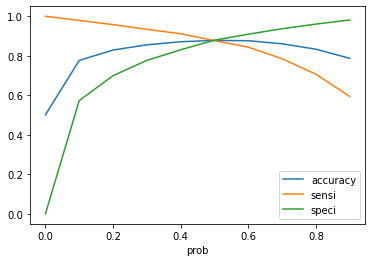

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

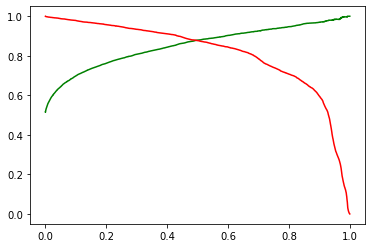

In [115]:
# Lets check the Precision Recall Curve

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_lr.Churn, y_train_pred_lr.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [116]:
# Making predictions on test set

X_test_sm = sm.add_constant(X_test[X_train_bal[col].columns])

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)
y_pred_lr = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_lr= y_pred_lr.rename(columns={ 0 : 'Churn_Prob'})
y_pred_lr['final_predicted'] = y_pred_lr.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_lr.head()

churn  Churn_Prob  final_predicted
20296      1    0.615009                1
8279       1    0.164579                0
72269      0    0.245491                0
65602      0    0.143433                0
42758      1    0.508753                1

In [117]:
confusion = metrics.confusion_matrix(y_pred_lr.churn, y_pred_lr.final_predicted)
print(confusion)

[[7228 1023]
 [ 261  489]]


In [118]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_pred_lr.churn, y_pred_lr.final_predicted))

0.857349183424064


In [119]:
# Checking Precison and Recall

print(precision_score(y_train_pred_lr.Churn, y_train_pred_lr.predicted))

print(recall_score(y_train_pred_lr.Churn, y_train_pred_lr.predicted))

print(precision_score(y_pred_lr.churn, y_pred_lr.final_predicted))

print(recall_score(y_pred_lr.churn, y_pred_lr.final_predicted))

0.8790962400827872
0.8766769865841073
0.32341269841269843
0.652


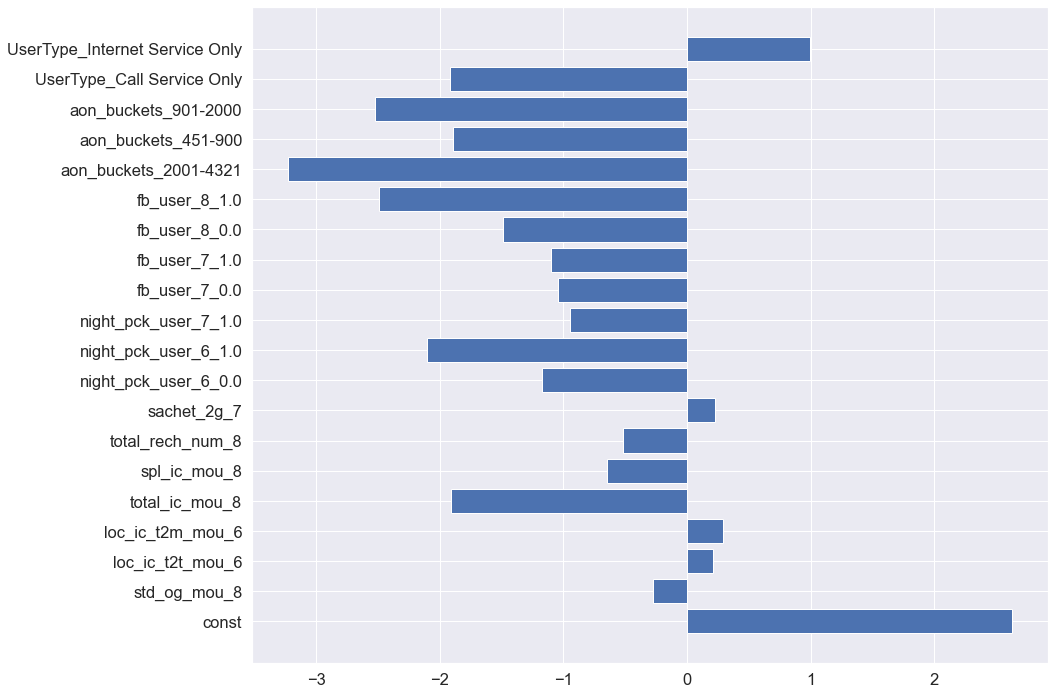

In [120]:
# Looking at the feature values based on regression results
values = list(res.params)

sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
plt.barh( range(len(values)), values)
plt.yticks(range(len(values)),X_train_sm.columns)
plt.tight_layout()
plt.show()

#### Precision on test using Logistic Regression without PCA is 65.2%.

### Step 4.2.2: Model 2: Decision Tree

In [121]:
# Instantiate Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42)

In [122]:
# Hyperparameter tuninig for Decision Tree classifier model

dtparams = { 
          'max_depth': [3,5,10],
          'min_samples_leaf': [50,100,200,500],
          'min_samples_split': [50,75,100],
          'criterion':['gini','entropy'],
          'max_features': ['auto','sqrt','log2']}

model_decisiontree = GridSearchCV(estimator=dt, param_grid=dtparams, cv=4, n_jobs=-1,verbose=1,scoring="recall")

In [123]:
# Fit the model on the training dataset

model_decisiontree.fit(X_train_bal,y_train_bal)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [50, 100, 200, 500],
                         'min_samples_split': [50, 75, 100]},
             scoring='recall', verbose=1)

In [124]:
# Best estimator values for Decision Tree classifier model

model_decisiontree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [125]:
# DecisionTree model with best hyper parameter value

model_decisiontreebest = model_decisiontree.best_estimator_

In [126]:
# Predicting the target variable

y_test_dtpred = model_decisiontreebest.predict(X_test)

In [127]:
# Accuracy on train data set.

metrics.accuracy_score(y_test,y_test_dtpred)

0.8661259860015554

In [128]:
# Confusion Matrix

metrics.confusion_matrix(y_test,y_test_dtpred)

array([[7221, 1030],
       [ 175,  575]], dtype=int64)

In [129]:
# Classification report for the Decision Tree Classifier model.

print(metrics.classification_report(y_test,y_test_dtpred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8251
           1       0.36      0.77      0.49       750

    accuracy                           0.87      9001
   macro avg       0.67      0.82      0.71      9001
weighted avg       0.92      0.87      0.89      9001



In [130]:
# Calculating Recall metric

print(recall_score(y_test,y_test_dtpred))

0.7666666666666667


In [131]:
# Printing AUC Score 

print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_test_dtpred))

AUC Score (Train): 0.820917


In [132]:
# Series that contains top important features.

feature_scores = pd.Series(model_decisiontreebest.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False).nlargest(23)
feature_scores

loc_ic_mou_8            0.411138
arpu_diff               0.069916
max_rech_amt_8          0.066401
total_ic_mou_8          0.060987
roam_og_mou_8           0.057634
roam_ic_mou_8           0.048885
night_pck_user_8_0.0    0.032670
av_rech_amt_data_7      0.017435
aon_buckets_451-900     0.011668
spl_ic_mou_6            0.009923
std_og_mou_7            0.009681
loc_ic_mou_6            0.009631
last_day_rch_amt_7      0.008667
fb_user_8_1.0           0.007085
total_rech_num_8        0.006499
loc_og_mou_8            0.006204
monthly_2g_7            0.005790
total_rech_data_8       0.005626
last_day_rch_amt_8      0.005578
spl_ic_mou_8            0.005399
loc_ic_t2m_mou_6        0.005096
vol_2g_mb_7             0.004820
roam_ic_mou_6           0.004739
dtype: float64

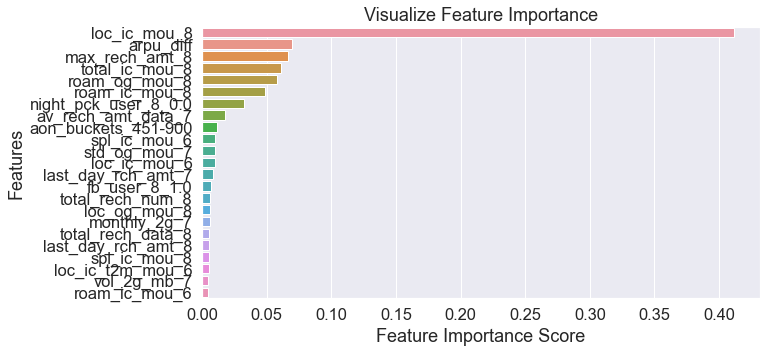

In [133]:
# Visualize top features.

ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=feature_scores,y=feature_scores.index)
ax.set_title("Visualize Feature Importance")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

#### High Interpretability model Decision Tree gives AUC of 0.82 and Recall of 76.7%

#### Inference: Out of the interpretability models, Decision Tree works well based on the model evaluation.

#### Feature Importance- Top 10 features that lead to Churn in descending order are:
    1. loc_ic_mou_8
    2. arpu_diff
    3. max_rech_amt_8
    4. total_ic_mou_8
    5. roam_og_mou_8
    6. roam_ic_mou_8
    7. night_pck_user_8_0.0
    8. av_rech_amt_data_7
    9. aon_buckets_451-900
    10. spl_ic_mou_6

#### Recommendations based on the columns achieved from Feature Importance:
    1. Provide cheap Local plans to the customers (loc_ic_mou_8).
    2. Watch out for the sudden drop in the ARPU (arpu_diff).
    3. Providing the combo plans to the customer based on their usage (max_rech_amt_8).
    4. Provide cheap Roaming plans to the customers (roam_og_mou_8 & roam_ic_mou_8).